<a href="https://colab.research.google.com/github/emgifford/Post-Graduate-Certificate-in-Data-Science-and-Business-Analytics/blob/main/emily_gifford_Project_SLC_DSBA_INNHotels_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

**Goal:** **Analyze the data provided to find which factors have a high influence on booking cancellations...**

Then use **machine lerning to build a predictive model that can predict which booking is going to be canceled in advance**--efforts can aid in the better profitability of the company. 

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
#allowing google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing datasets 
df_main = pd.read_csv("/content/drive/My Drive/Supervised Learning Classifications/Project 4/INNHotelsGroup.csv")
data = df_main.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
#checking first 5 features of dataset 
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
#checking last 5 features of dataset 
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [ ]:
#checking shape of data 
data.shape

(36275, 19)

The dataset has 36275 rows and 19 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There is both numerical and object (categorical data) in this dataset. 

In [ ]:
#checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No NaN values it appears 

In [ ]:
#checking for duplicate values
data.duplicated().sum()

0

No duplicated values 

In [ ]:
#checking to see if all booking IDs are unique
data.Booking_ID.nunique()

36275

All booking_ID are unique--thus might not be great for analysis--will drop column. 

In [ ]:
#dropping Booking_ID
data = data.drop(["Booking_ID"], axis=1)

**Statistical Summary** 

In [ ]:
#Checking statistical summary of dataset 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


**Categorical/Non-numerical Summary**

In [ ]:
#summary of categorical/non-numerical values
data.describe(include='object').T

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


Most bookings are not cancelled, but we are focusing on the cancellations and seeing which critiera may have correlated features with cancellations. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Univariate Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Observations on lead time** 

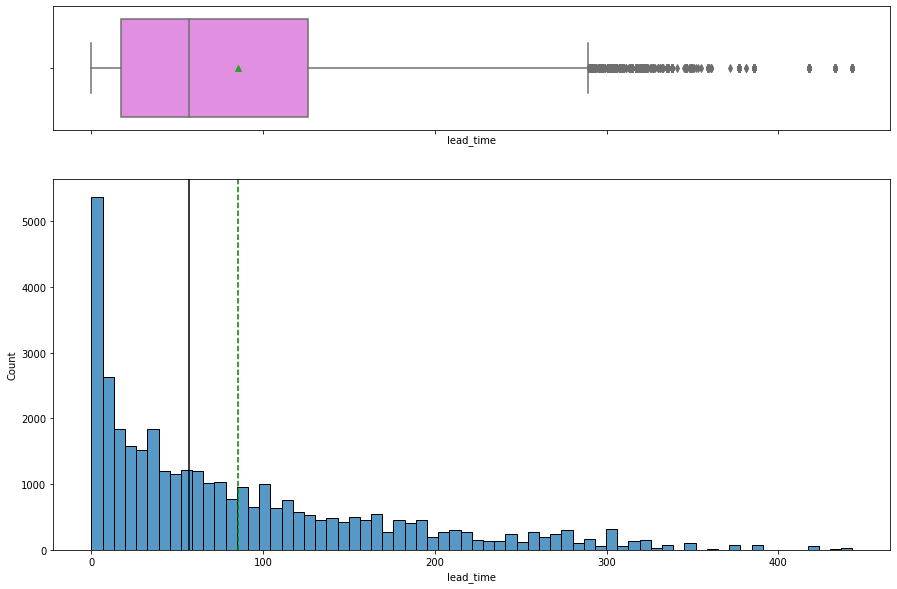

In [ ]:
histogram_boxplot(data, "lead_time")

Data appears highly right-skewed for lead time. Many ouliers. 
Mean is around 70 days. 

**Observations on average price per room**

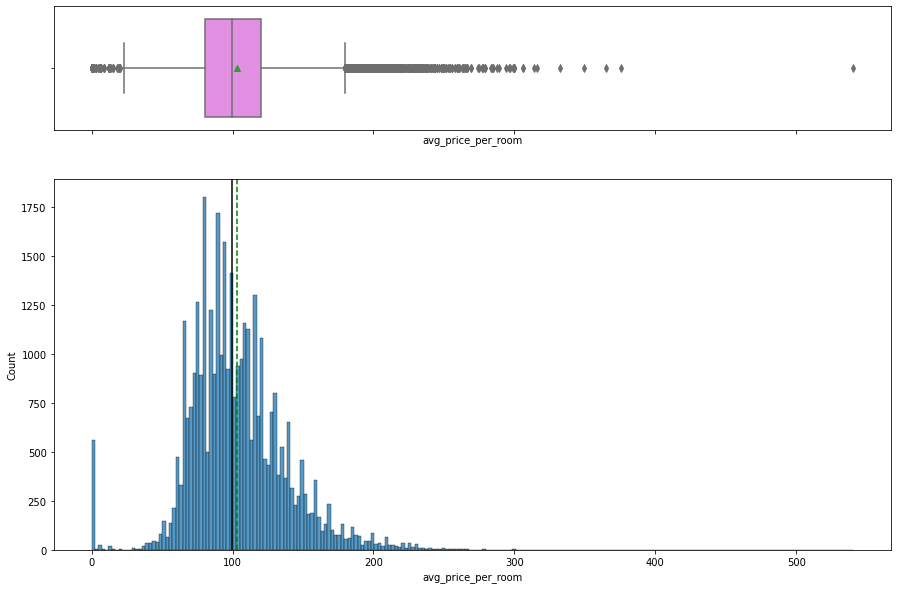

In [ ]:
histogram_boxplot(data, 'avg_price_per_room')

Too many outliers on both sides--average price per room is 100 euros. 

In [ ]:
data[data["avg_price_per_room"] == 0]
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()


Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [ ]:
#Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

#Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

#Calculating IQR
IQR = Q3 - Q1

#Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker


179.55

In [ ]:
#setting the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Observations on number of previous booking cancellations**

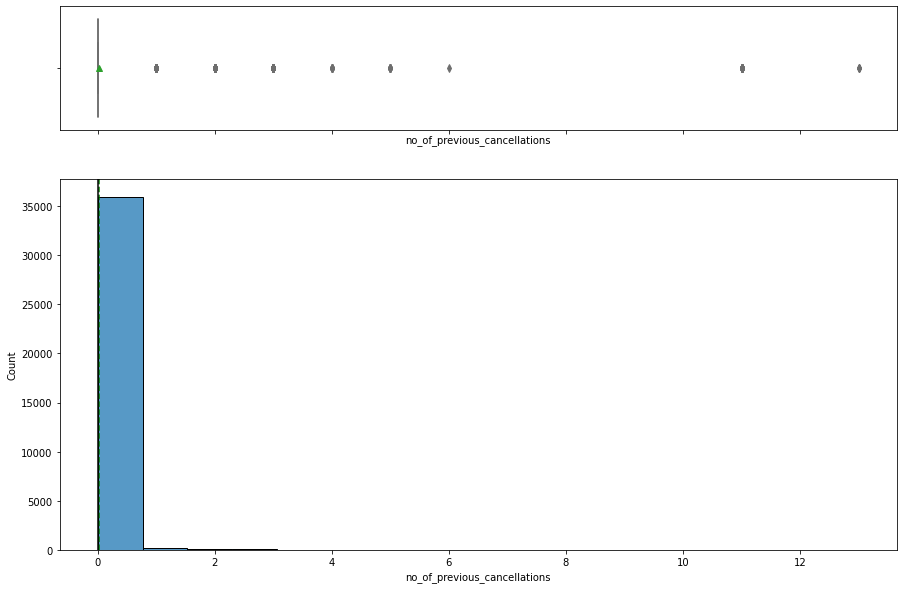

In [ ]:
histogram_boxplot(data, 'no_of_previous_cancellations')

Lots of outliers, appears heavily skewed. Not normally distributed. Looks as if .5 to 1 is where the values lie. 

**Observations on number of previous booking not canceled**

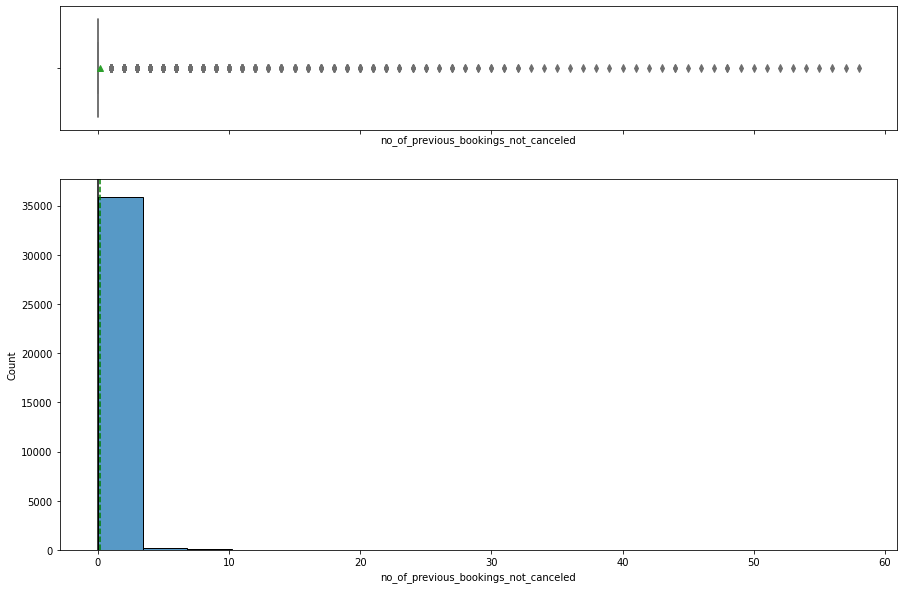

In [ ]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

Lots of outliers, data heavily skewed similar to no of previous cancellations.

In [ ]:
#better labeled barplots 

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

**Observations on number of adults**

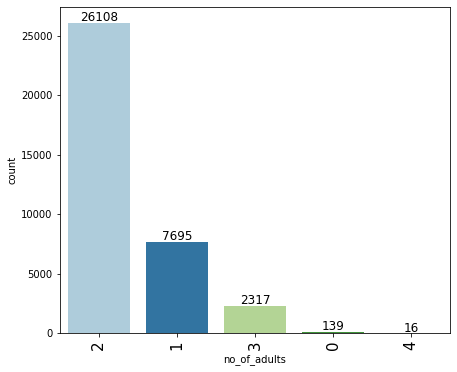

In [ ]:
labeled_barplot(data, 'no_of_adults')

Looks as if number of adults is mostly at 2.0, makes sense as many people travel with a plus 1).

**Observations on number of children**

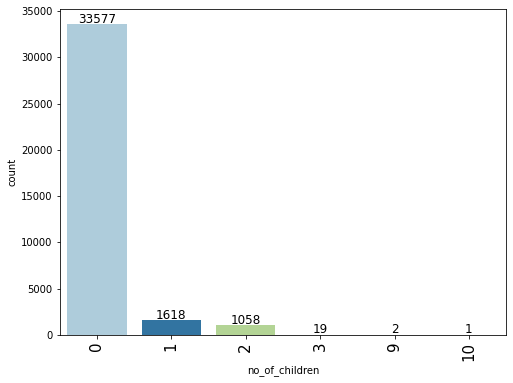

In [ ]:
labeled_barplot(data, 'no_of_children')

Something seems off here--most people don't have 10 children; Also it appears most of the time children are not brought. 

In [ ]:
#making an adjustment: replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Observations on number of week nights**

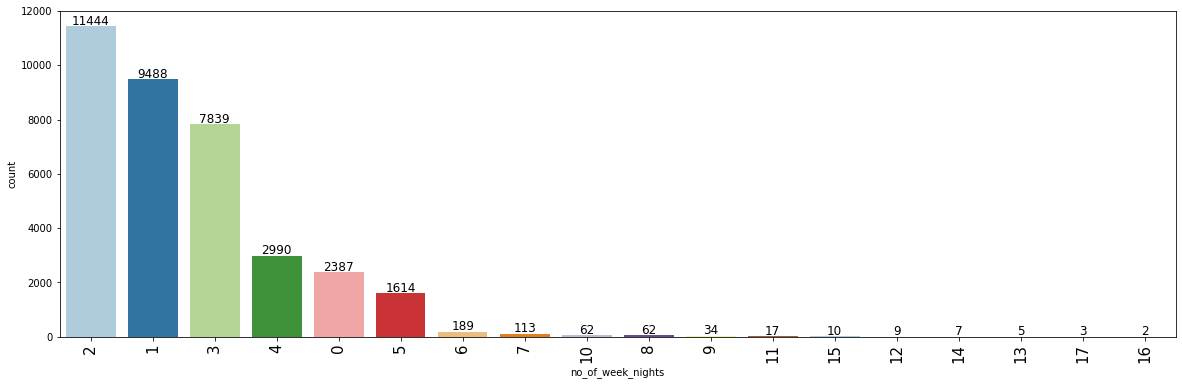

In [ ]:
labeled_barplot(data, 'no_of_week_nights')

Appears that most popular # of week nights stayed is around 2 nights.

**Observations on number of weekend nights**

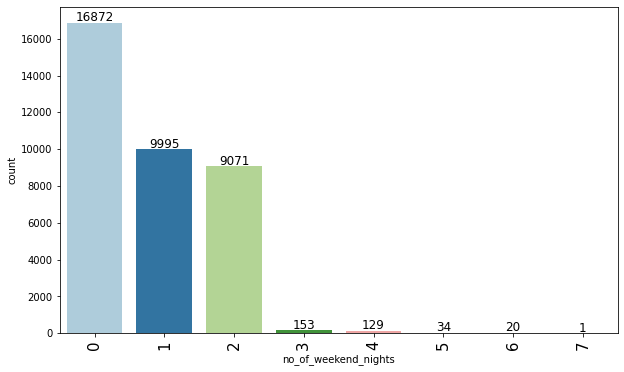

In [ ]:
labeled_barplot(data, 'no_of_weekend_nights')

Less weekend nights stayed. Maybe too expensive? Also there are less weekend nights than week nights. 

**Observations on required car parking space**

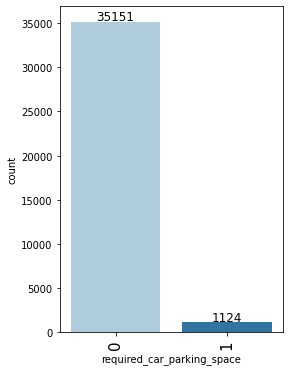

In [ ]:
labeled_barplot(data, 'required_car_parking_space')

Very one-sided data- most did not require parking space. 

Really only 2017 or 2018, but this is continous. 

**Observations on type of meal plan**

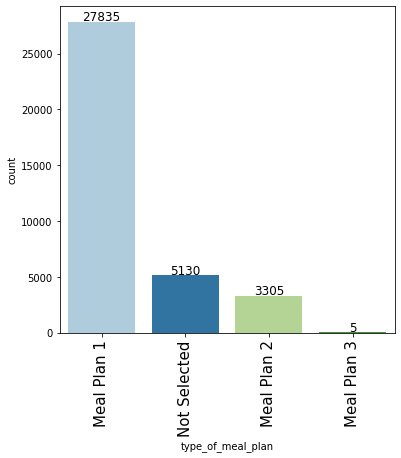

In [ ]:
labeled_barplot(data, 'type_of_meal_plan')

Meal plan 1 is the most popular; then it appears not selected is next. 

**Observations on room type reserved**

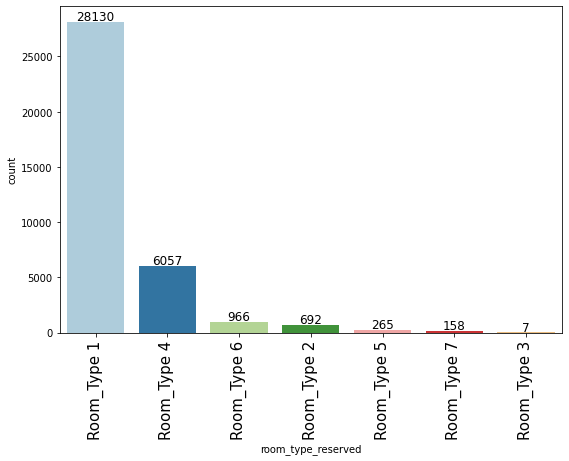

In [ ]:
labeled_barplot(data, 'room_type_reserved')

Overwhelmingly, Room_Type 1 is the most popular. 

**Observations on arrival month**

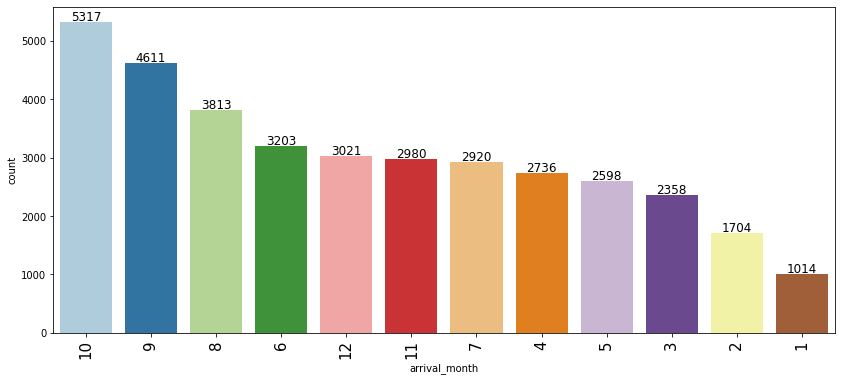

In [ ]:
labeled_barplot(data, 'arrival_month')

Maybe October is a good time to visit Portugal and check in; October (10, September (9), and August (8) are the most popular; January (1) is the least popular month. 

**Observations on arrival year**

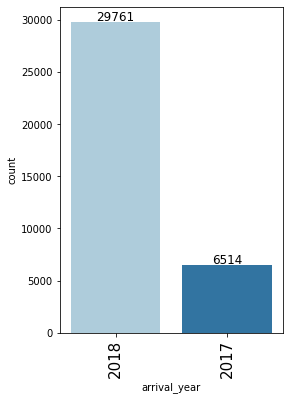

In [ ]:
labeled_barplot(data, 'arrival_year')

Most of the data is in 2018. 2017 is the other section. 

**Observations on market segment type**

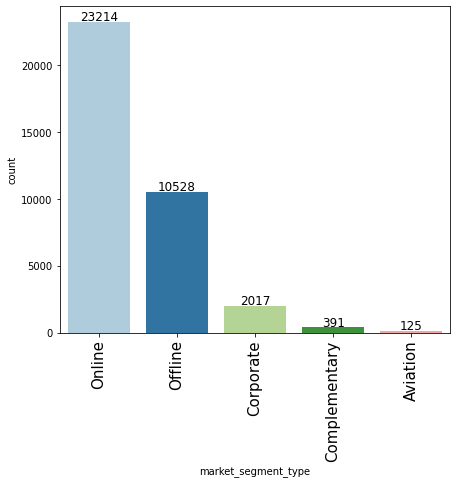

In [ ]:
labeled_barplot(data, 'market_segment_type')

Appears online is the way of market segment overwhelmingly. 

**Observations on number of special requests**

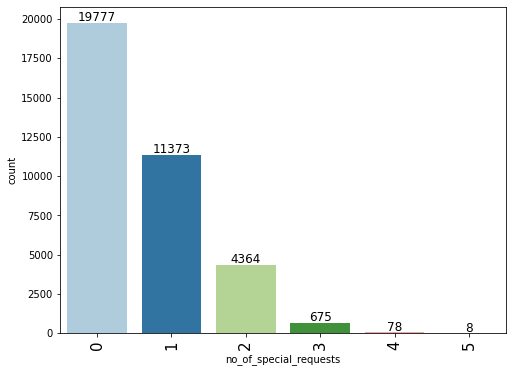

In [ ]:
labeled_barplot(data, 'no_of_special_requests')

Most do not have special requests. 

**Observations on booking status**

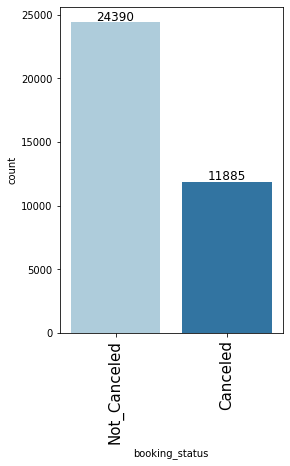

In [ ]:
labeled_barplot(data, 'booking_status')

In [ ]:
11885/36275 #finding percentage of canceled over the total 

0.32763611302549966

Most not cancelled--still a fair amount of cancelled though. Around 33% 
(11,885/36275)

Now to encode booking status for futher analysis...
Canceled bookings to 1 and Not_Canceled as 0

In [ ]:
#encoding booking status for further analysis 
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

**Observation on repeated guest**

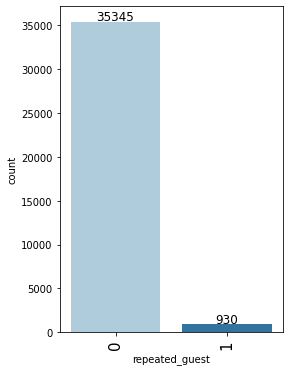

In [ ]:
labeled_barplot(data, 'repeated_guest')

There are 930 repeated guests 

**Bivariate Analysis**

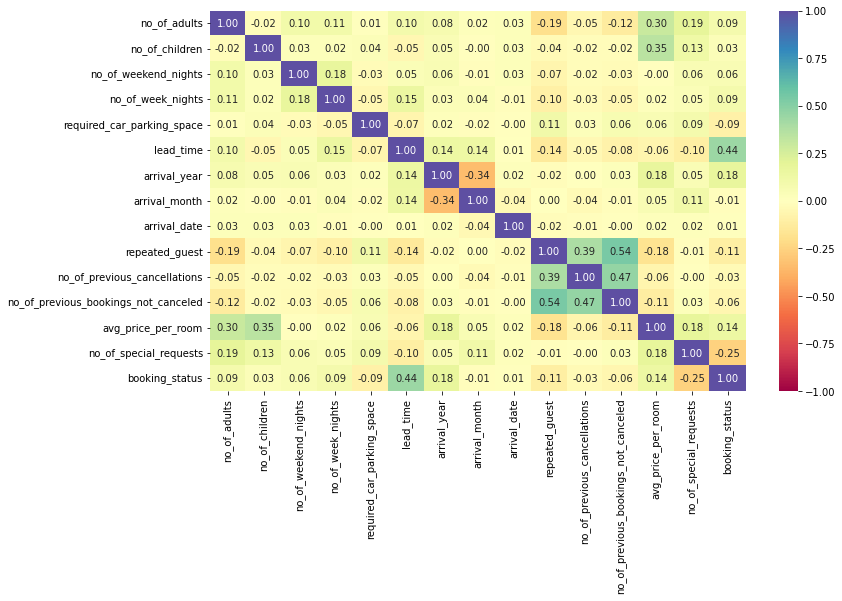

In [ ]:
#
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Nothing super striking in terms of correlation. 

However, there is a decent positive correlation (.54) with repeated_guest and no_of_previous_bookings_not_cancelled.

Also a somewhat positive correlation (.44) with lead_time and booking_status. 

There is a a somewhat negative correlation (-.34) with arrival_month and arrival_year. (Although arrival year is just 2017 and 2018 mainly). 

*WRT Target and Stacked Barplot*

In [ ]:
#creating function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Market Segment and Average Price Per Room** 

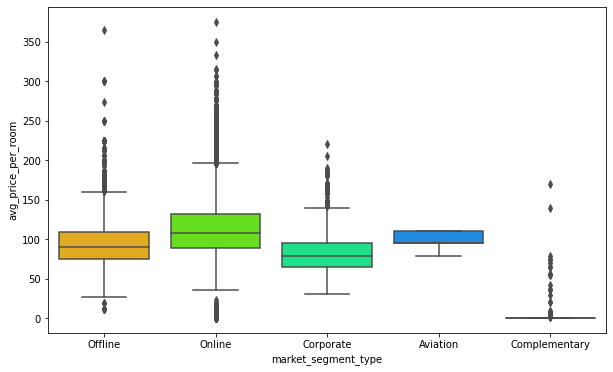

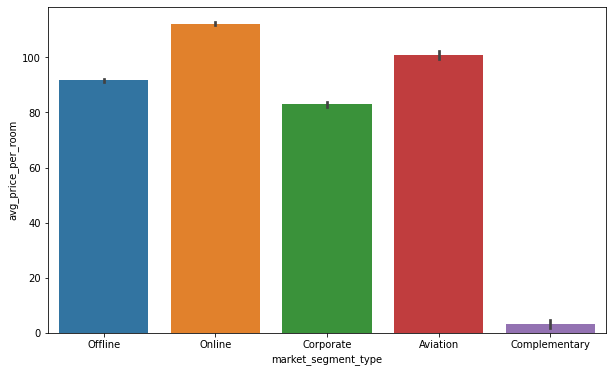

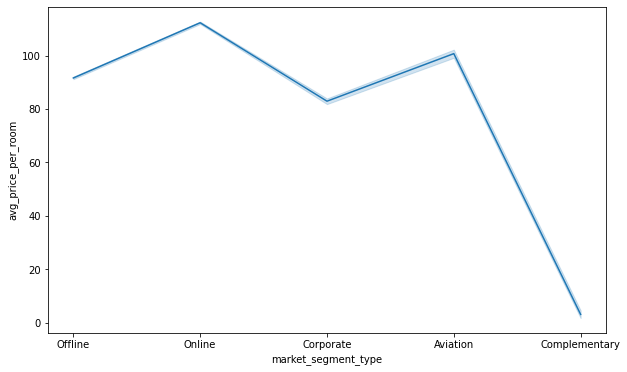

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x= "market_segment_type", y="avg_price_per_room")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "market_segment_type", y="avg_price_per_room")
plt.show()

Lots of ouliers, but all and all appears online has the highest price per room, followed by aviation. It makes sense complementary (free) is the lowest. Also makes sense that corporate is also lower (probably with reduced rates with mass booking for companies or the companies and the hotel have a deal going). 

**Booking Status and Market Segment** 

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


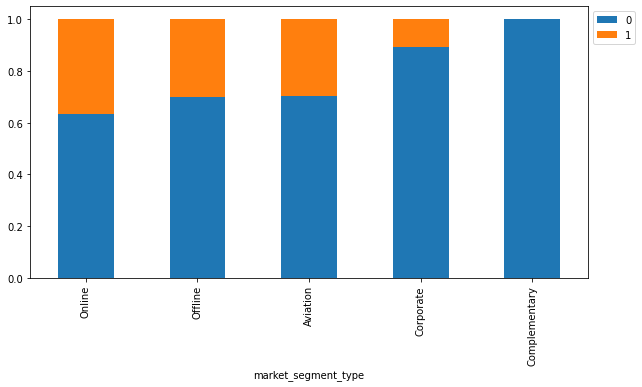

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

It makes sense that free rooms not canceled--probably because the guest doesn't have to pay. Online, Offline, and Aviation have similar breakdowns of cancelations. Corporate doesn't have as many cancelations- maybe due to the work nature. 

**Booking Status and Average Price Per Room** 

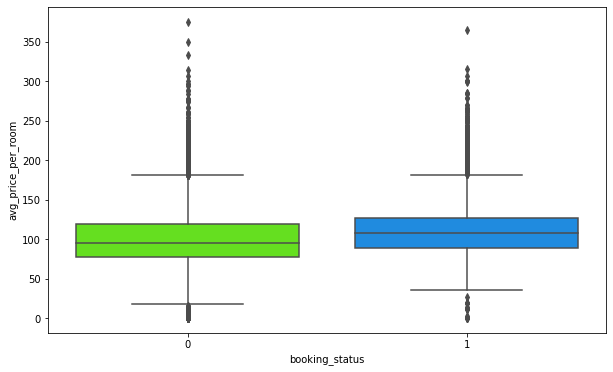

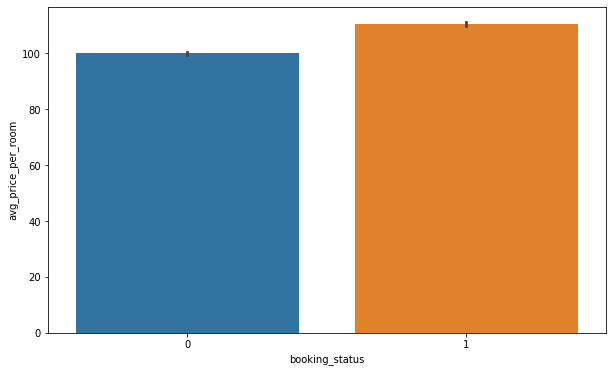

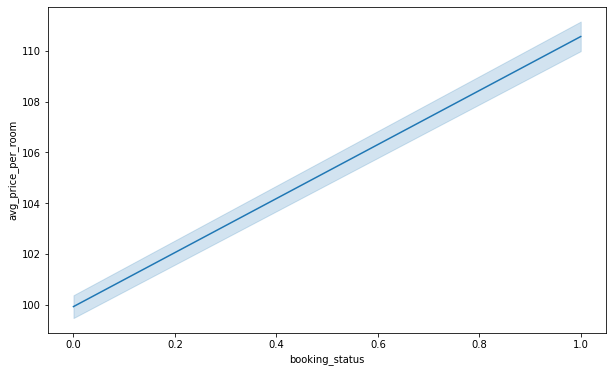

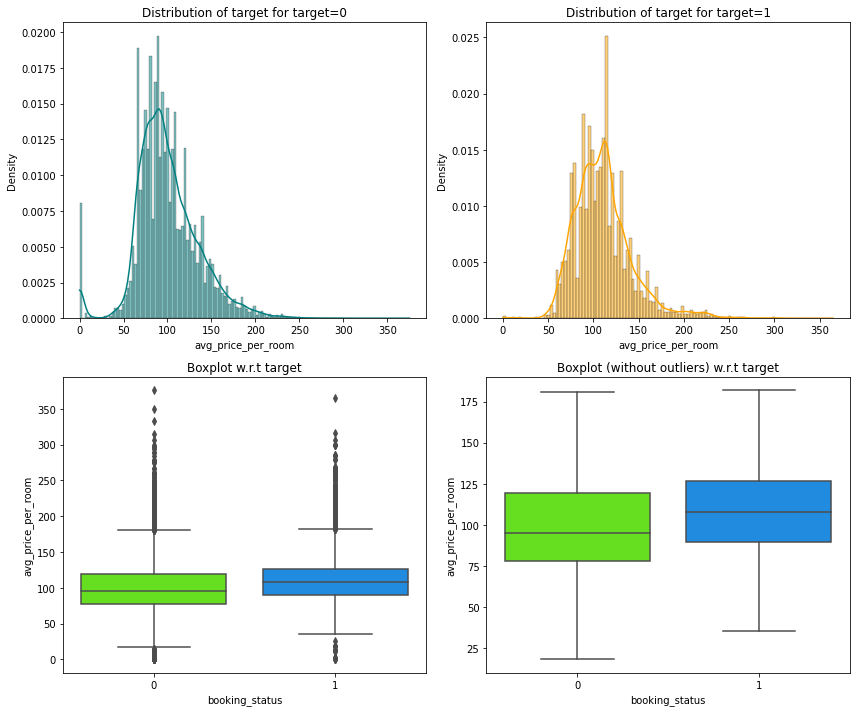

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="booking_status", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x= "booking_status", y="avg_price_per_room")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "booking_status", y="avg_price_per_room")
plt.show()

distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

Although there's a lot of ouliers, it appears that the looking at the boxplot without outliers, it appear that there is a strong positive correlation between higher avg room price and cancelations. 

**Booking Status and Lead Time** 

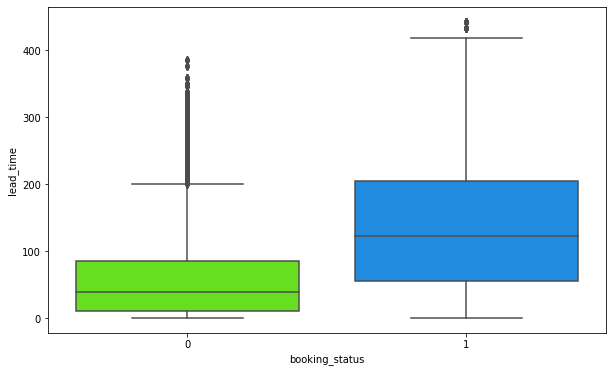

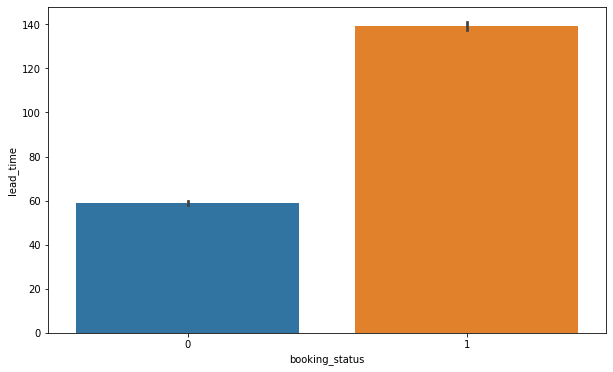

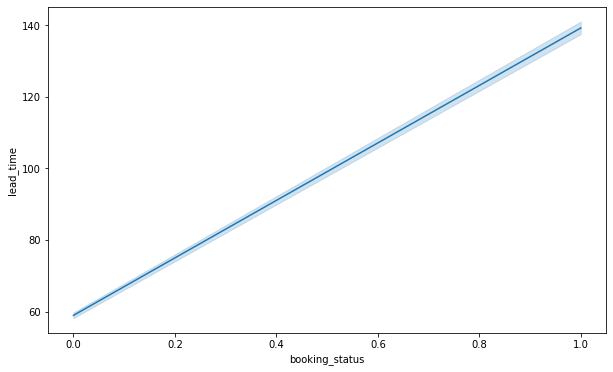

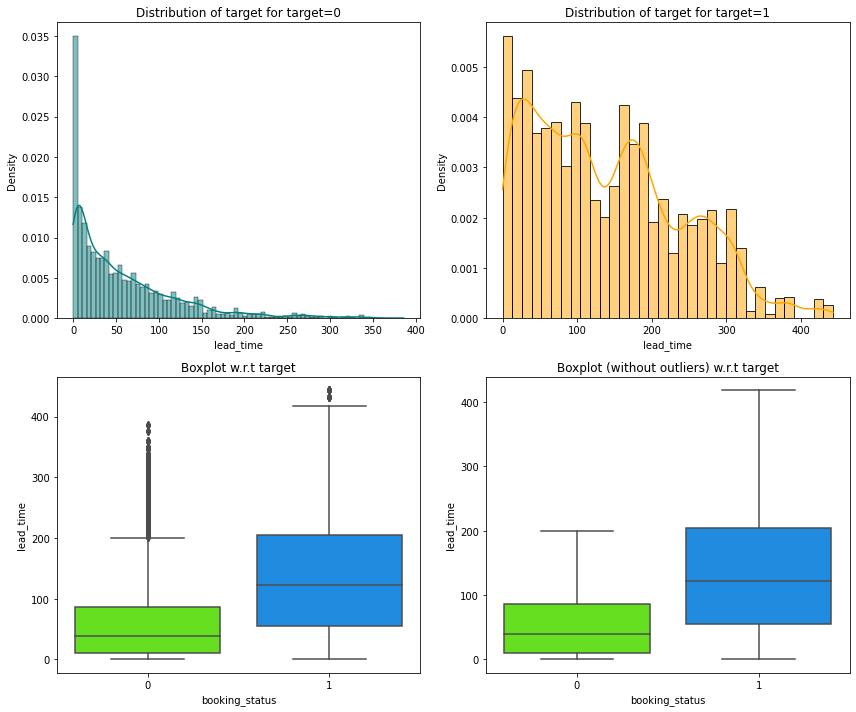

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="booking_status", y="lead_time", palette="gist_rainbow"
)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x= "booking_status", y="lead_time")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "booking_status", y="lead_time")
plt.show()

distribution_plot_wrt_target(data, "lead_time", "booking_status")

Strong correlation; as lead time goes up so do cancelations. Maybe makes sense as people change plans the farther they are from their bookings?  

**Repeating Guests and Repeating Guest Cancelations** 

repeated_guest                    0    1    All
no_of_previous_cancellations                   
All                           35345  930  36275
0                             35345  592  35937
1                                 0  198    198
2                                 0   46     46
3                                 0   43     43
11                                0   25     25
5                                 0   11     11
4                                 0   10     10
13                                0    4      4
6                                 0    1      1
------------------------------------------------------------------------------------------------------------------------


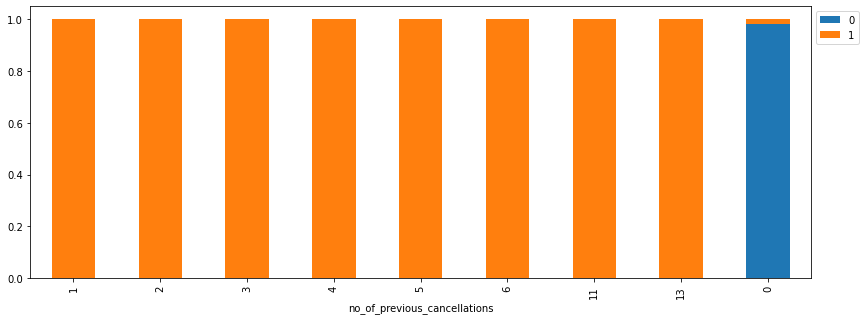

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
stacked_barplot(data, "no_of_previous_cancellations", "repeated_guest")
plt.figure(figsize=(10, 6))

Of repeated guests that have cancelled, it appears it's mainly only 1 time that they have cancelled.

In [ ]:
#subtracting the repeated_guests of whom have not cancelled from those who have 
930-529 

401

In [ ]:
#401 answer/930 (total repeated_guests)
401/930

0.4311827956989247

43% of repeated guests have cancelled. Mostly it appears only once. 

**Booking Status and Special Requests** 

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


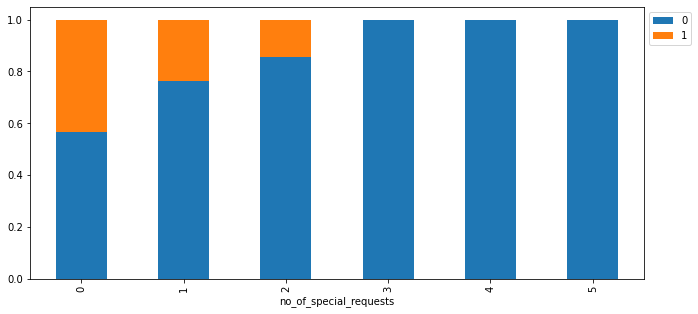

<Figure size 720x432 with 0 Axes>

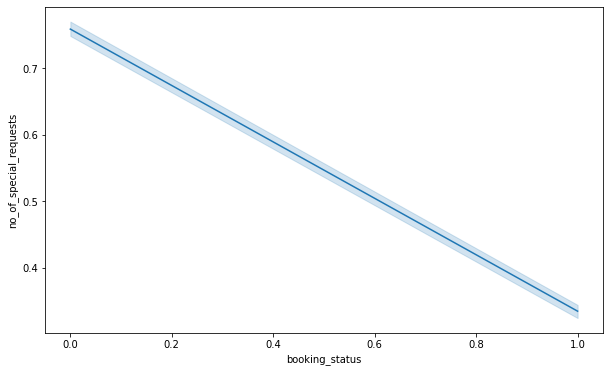

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "booking_status", y="no_of_special_requests")
plt.show()

There appears to be a negative correlation between number of special requests and booking status. The more number of special requests, the fewer cancellations. Maybe special arrangements are being made and guests do not want to cancel plans the more special arrangements they make. 

**Special Requests and Average Price Per Room** 



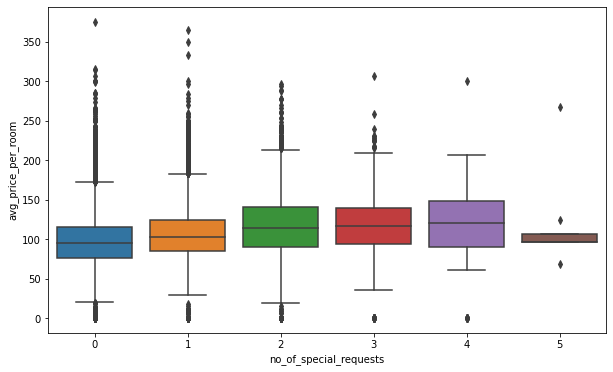

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='no_of_special_requests', y='avg_price_per_room')  
plt.show()

Too many outliers, showing without too. 

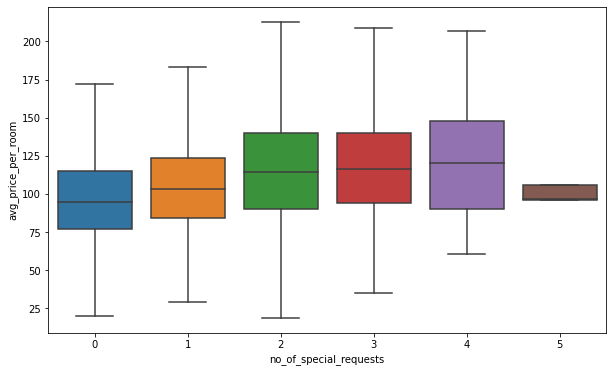

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='no_of_special_requests', y='avg_price_per_room', showfliers=False)  
plt.show()

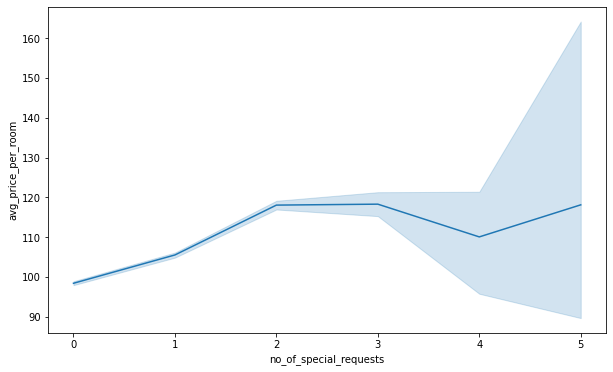

In [ ]:
#plotting line graph too off no_of_special_requests and avg_price_per_room
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='no_of_special_requests', y='avg_price_per_room')  
plt.show()

Not a very clear indication of correlation. 

**Breakdown of bookings cancelled each month**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


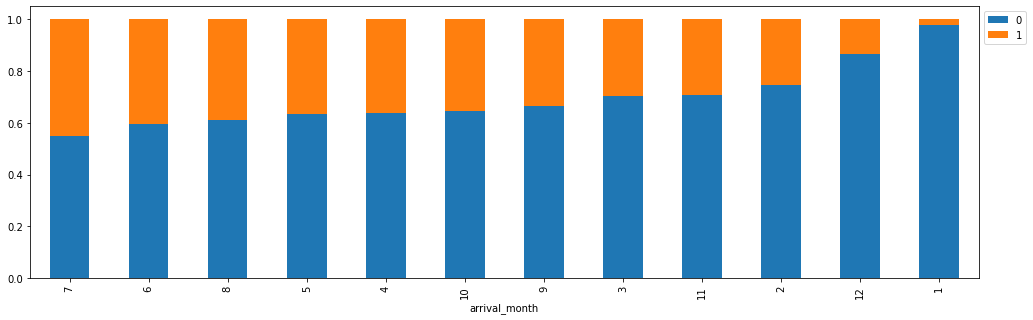

<Figure size 720x432 with 0 Axes>

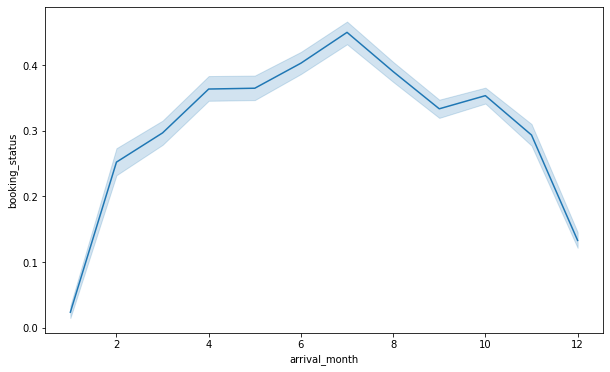

In [ ]:
stacked_barplot(data, "arrival_month", "booking_status")
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='arrival_month', y='booking_status')  
plt.show()

Appears July (7) has the most cancellations. January (1) has the least cancellations. 

**Arrival month and price per room**

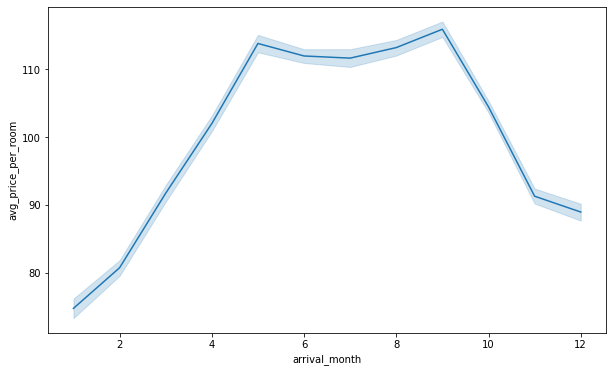

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room')
plt.show()

Appears May (5) and September (9) are the most expensive arrival months.  

**Answering Leading Questions:**

**1. What are the busiest months in the hotel?**

October (busiest), September (second busiest), August (third busiest) 

**2. Which market segment do most of the guests come from?** 

Market sement that most guests come from: Online. 

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

It appears online has the highest price per room, followed by aviation. It makes sense complementary (free) is the lowest. Also makes sense that corporate is also lower (probably with reduced rates with mass booking for companies or the companies and the hotel have a deal going).

**4. What percentage of bookings are canceled?** 

Around 33% of bookings are canceled. 

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

43% of repeated guests have cancelled. Mostly it appears only once. 

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

Yes, it appears in general if someone has more special requirements when booking there is less of a correlated chance they will cancel. 



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

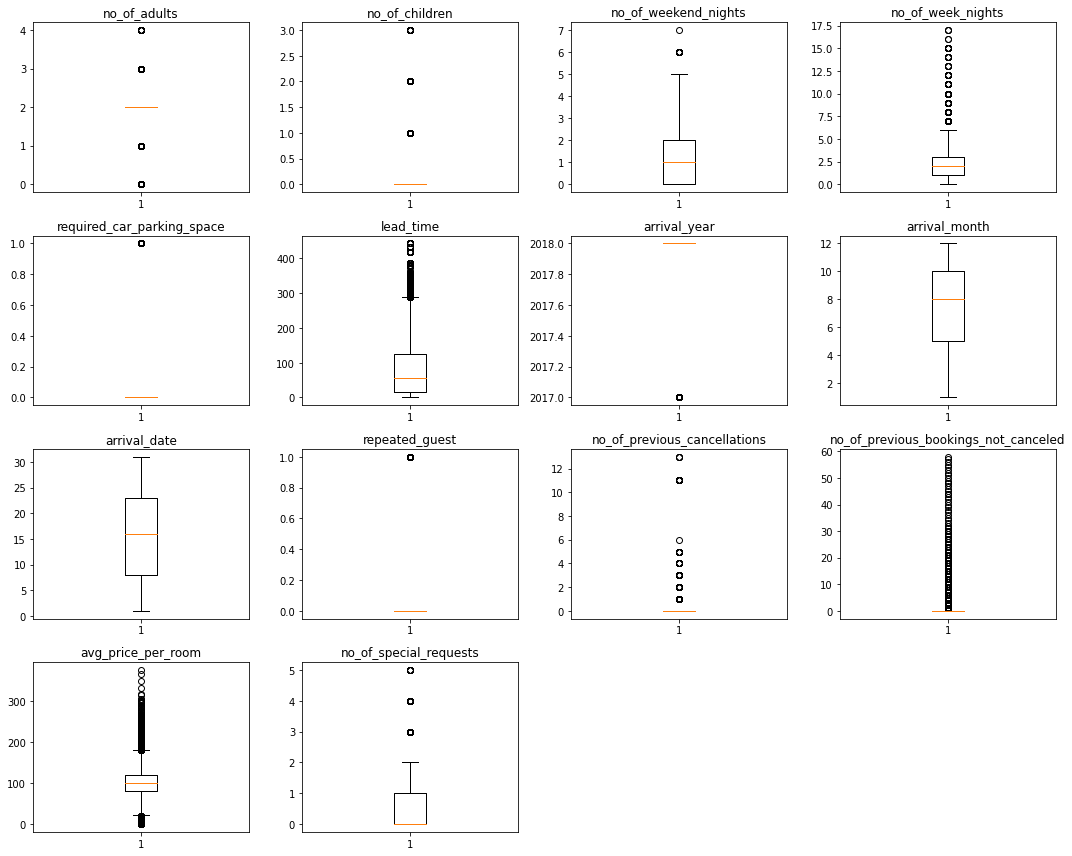

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

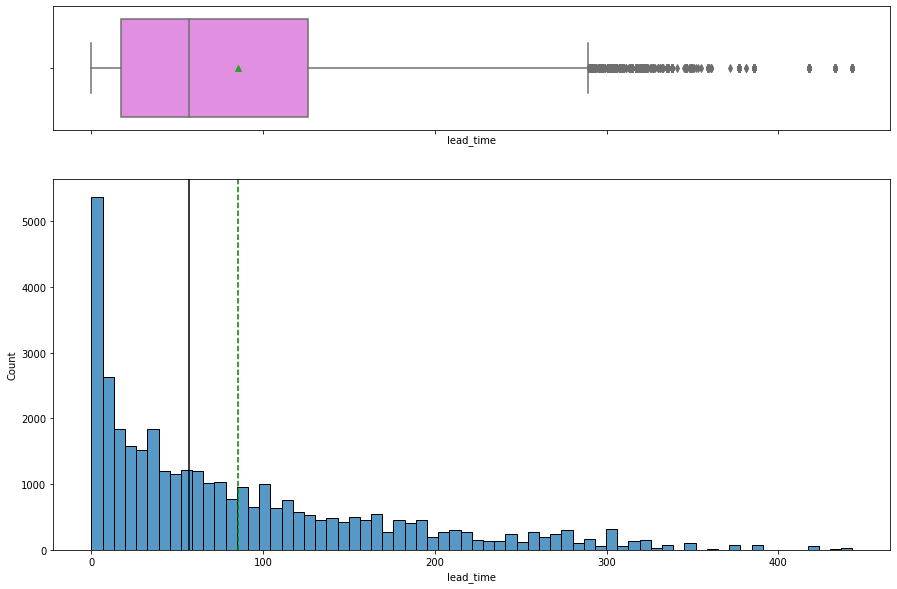

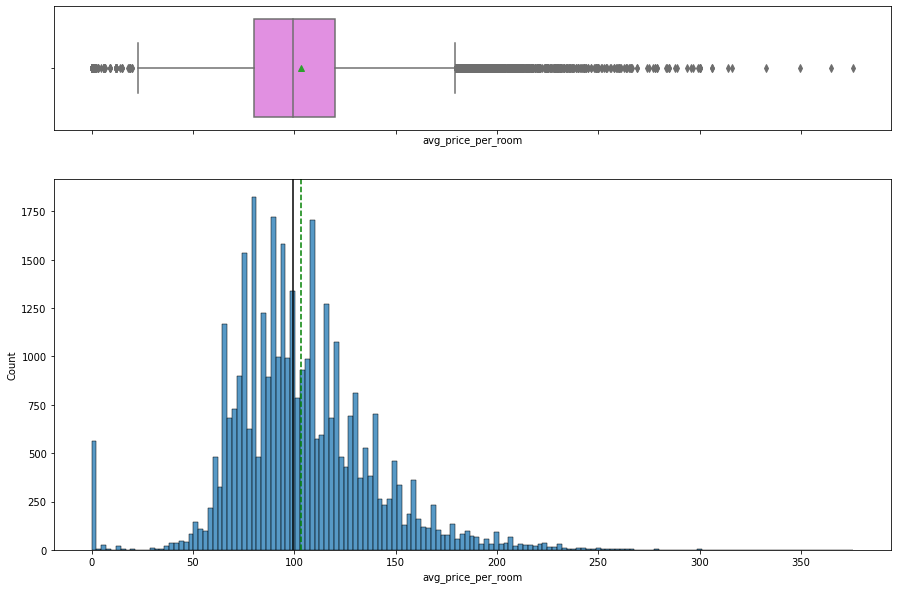

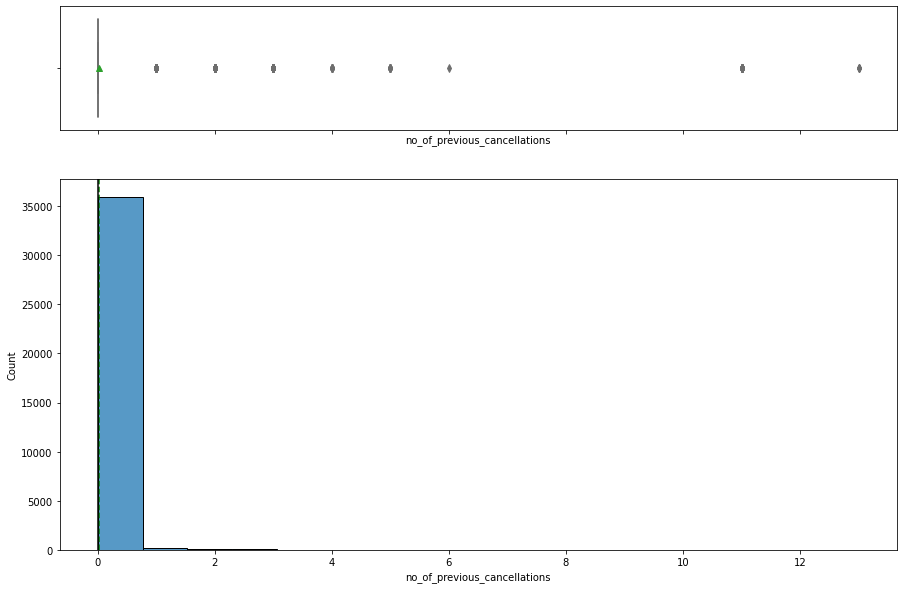

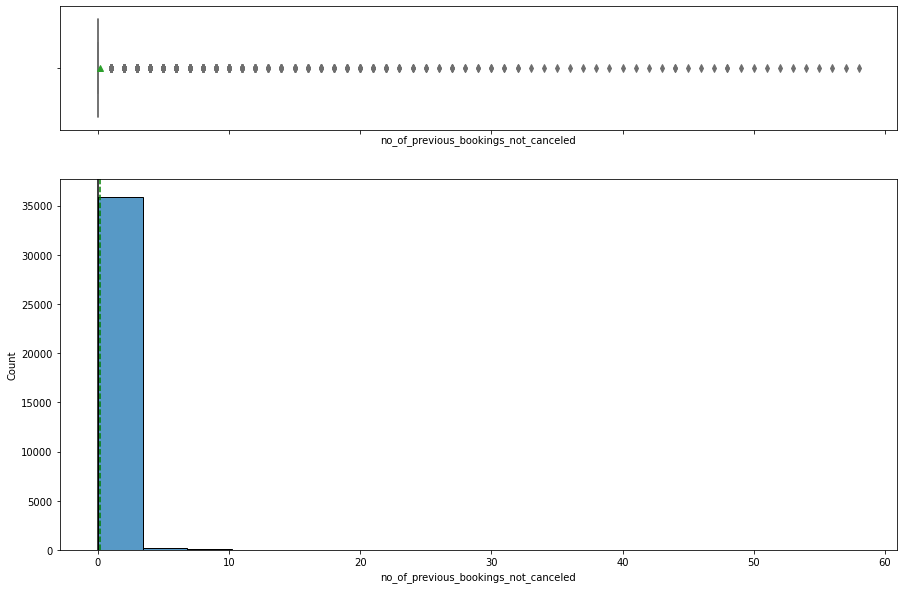

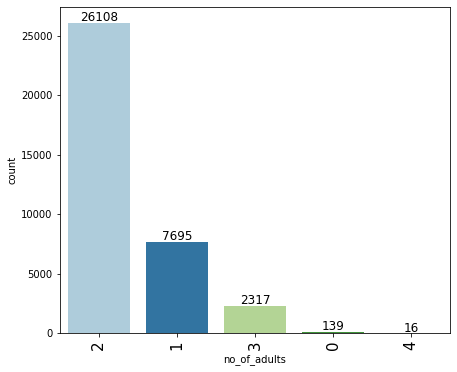

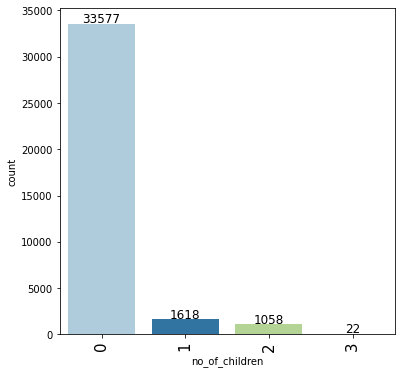

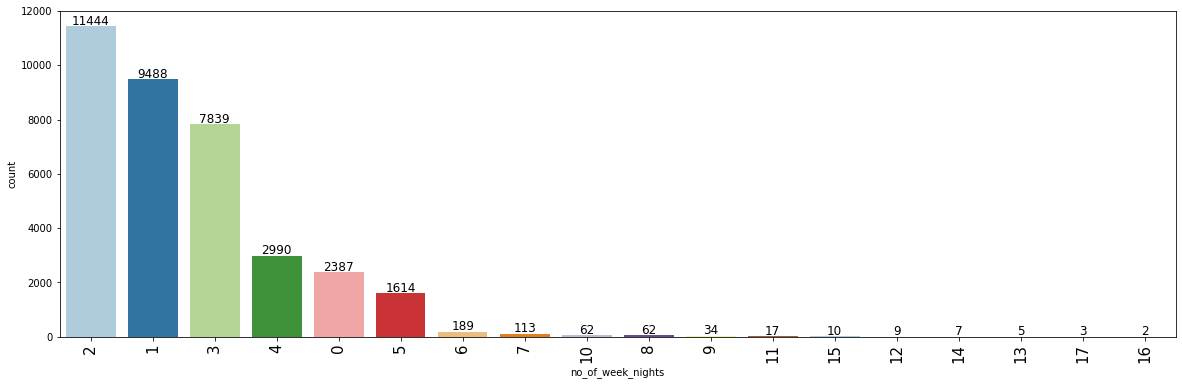

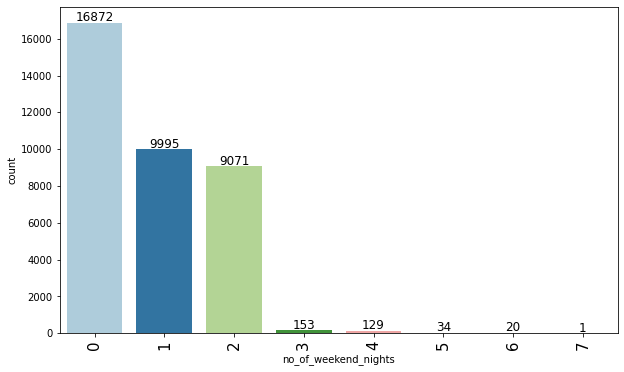

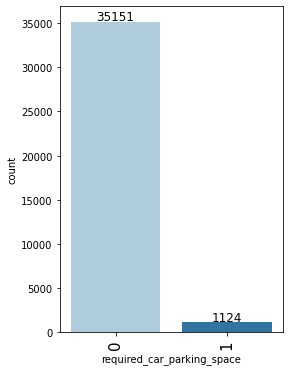

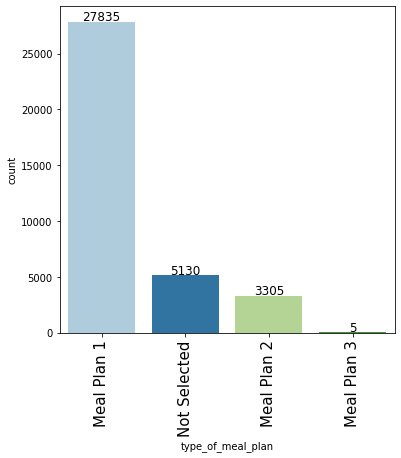

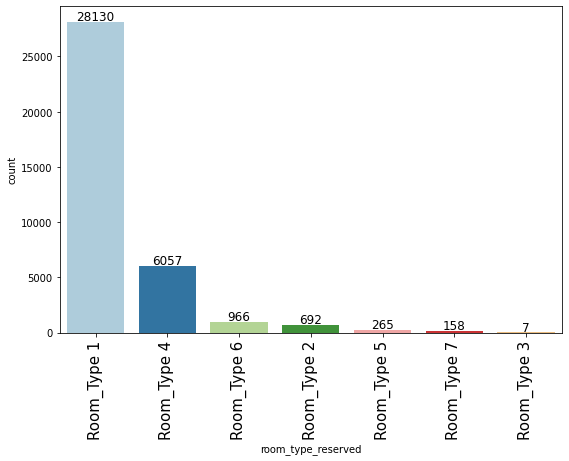

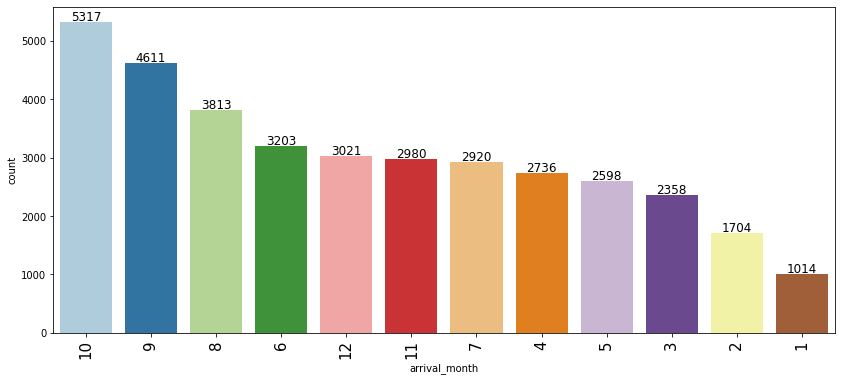

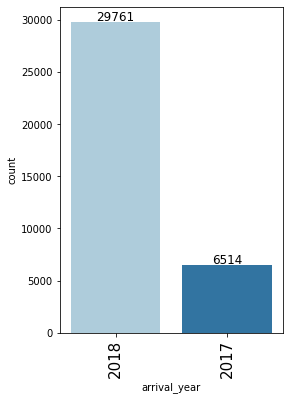

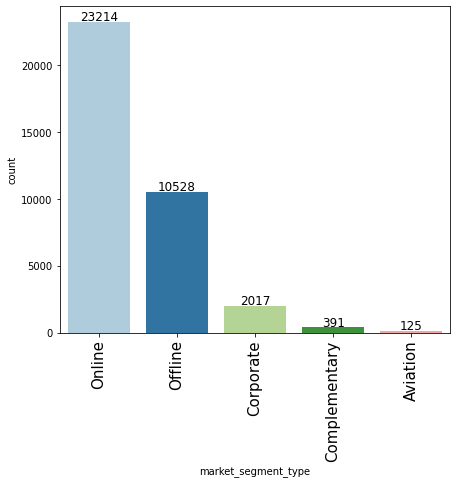

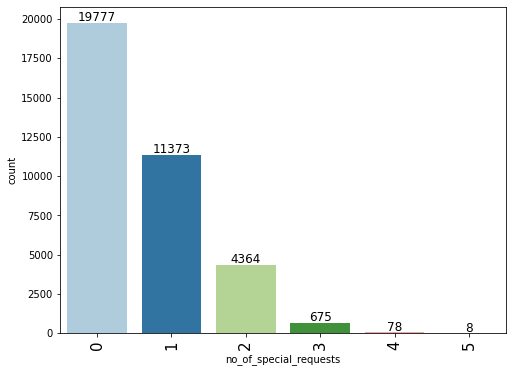

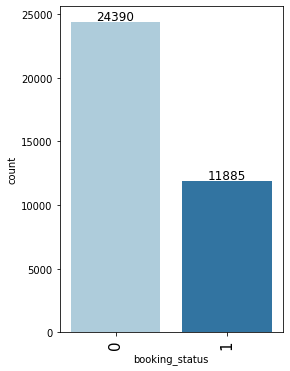

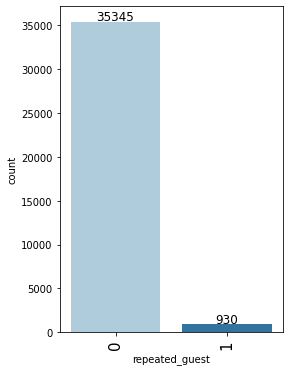

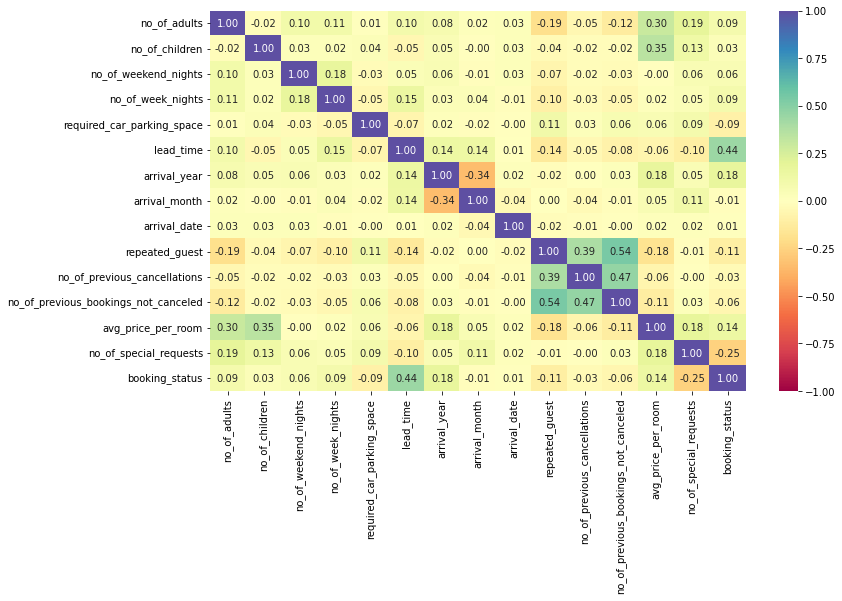

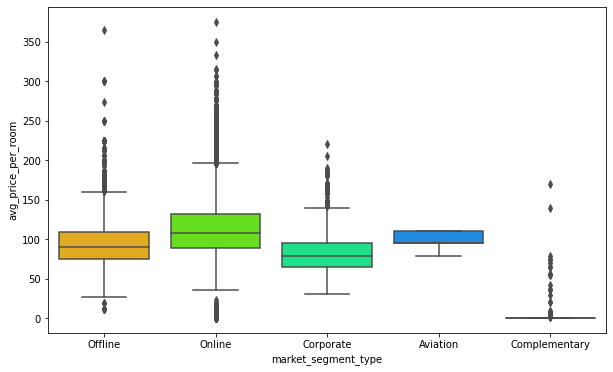

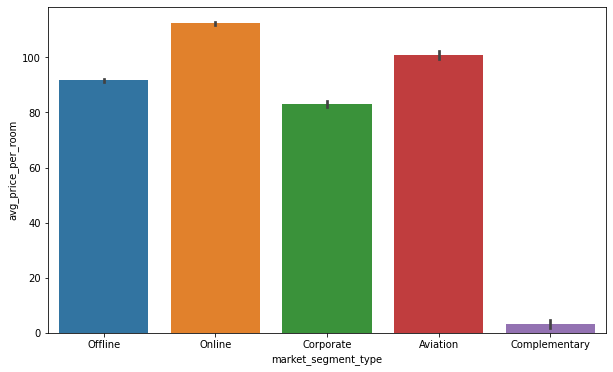

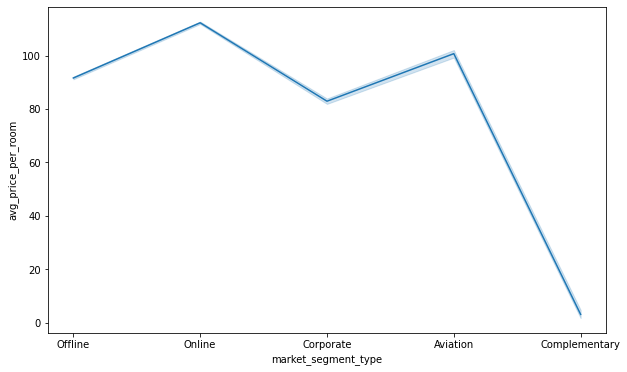

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


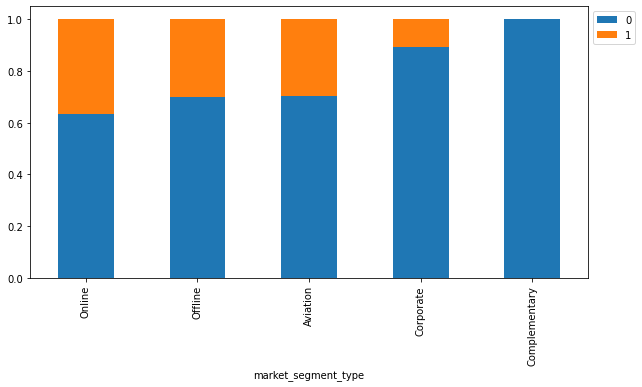

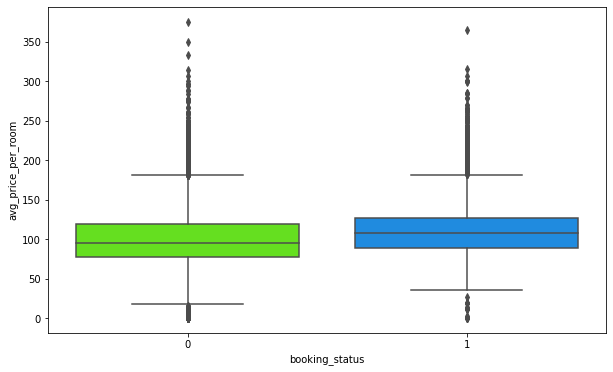

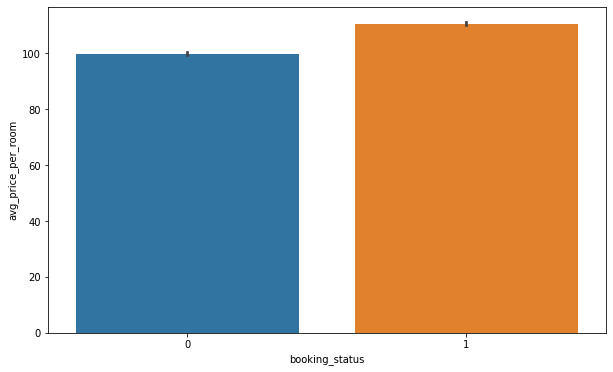

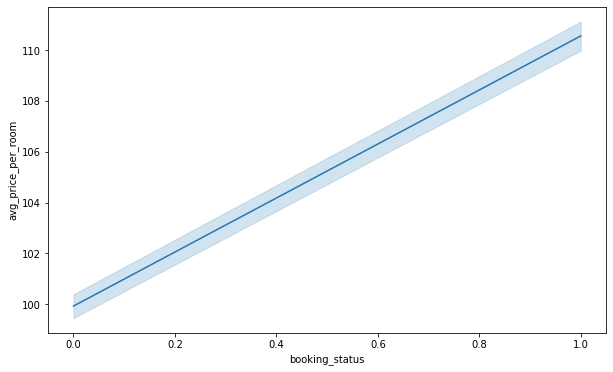

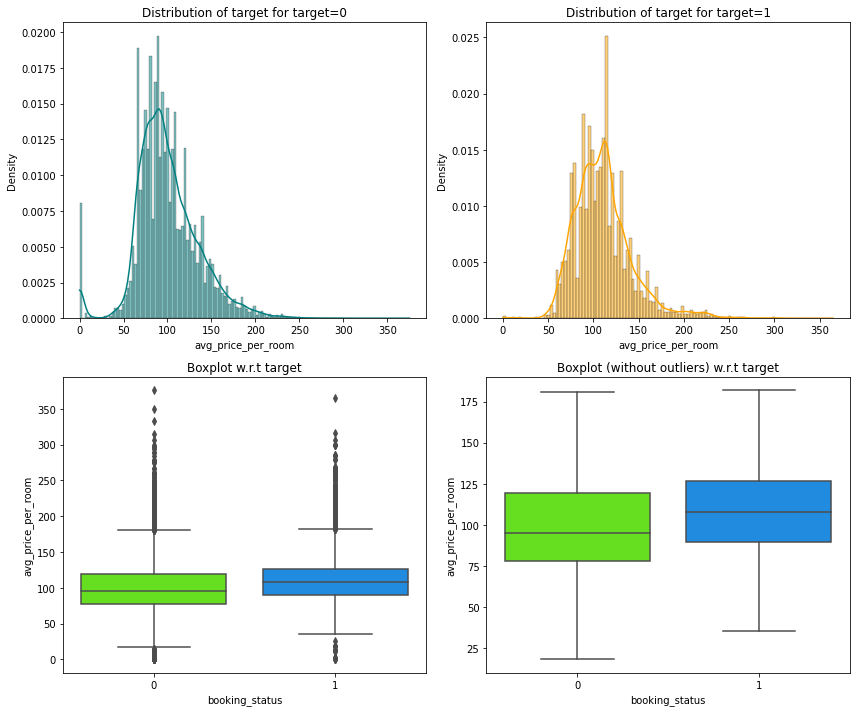

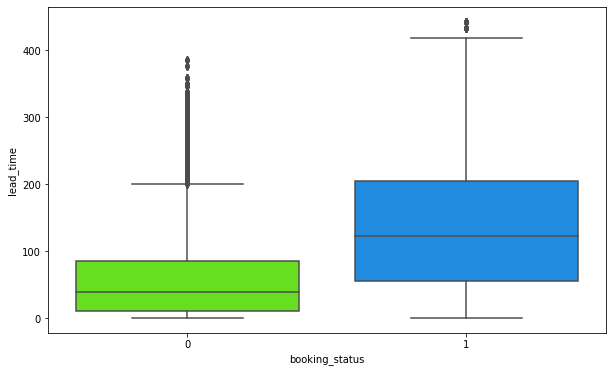

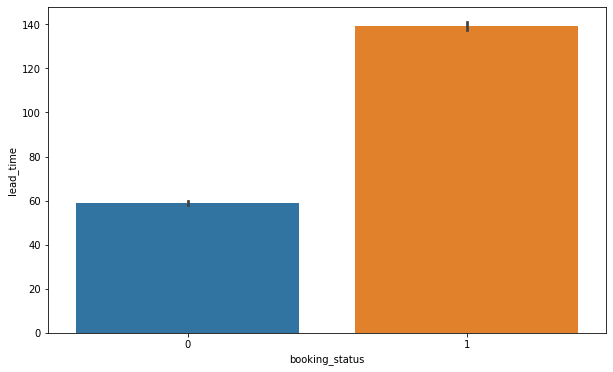

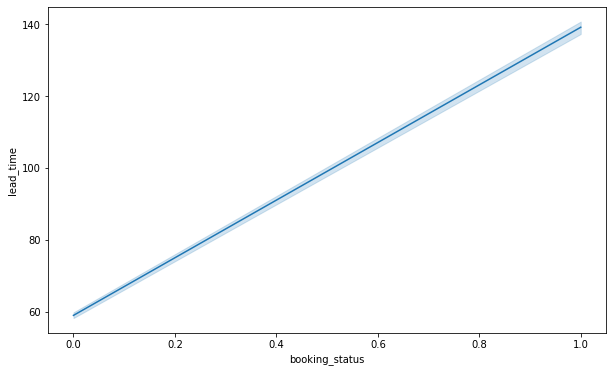

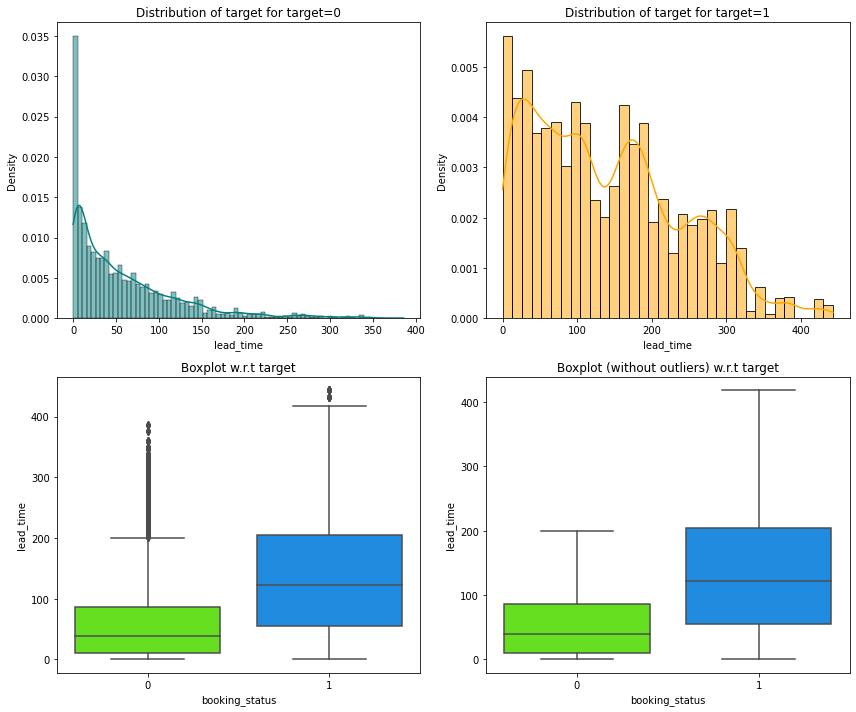

repeated_guest                    0    1    All
no_of_previous_cancellations                   
All                           35345  930  36275
0                             35345  592  35937
1                                 0  198    198
2                                 0   46     46
3                                 0   43     43
11                                0   25     25
5                                 0   11     11
4                                 0   10     10
13                                0    4      4
6                                 0    1      1
------------------------------------------------------------------------------------------------------------------------


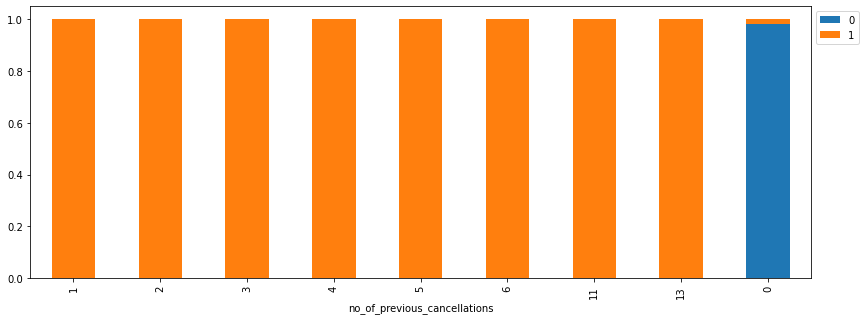

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


<Figure size 720x432 with 0 Axes>

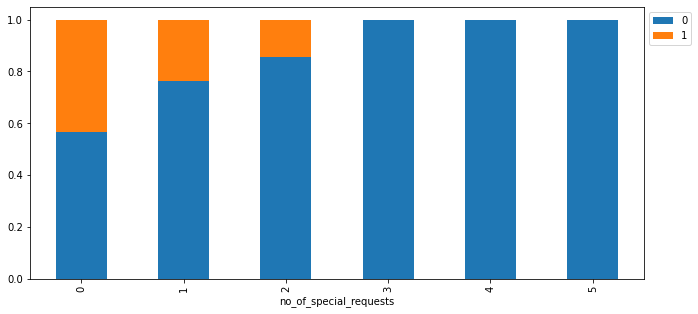

<Figure size 720x432 with 0 Axes>

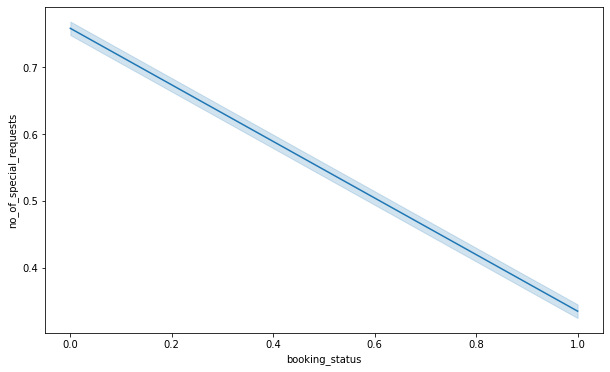

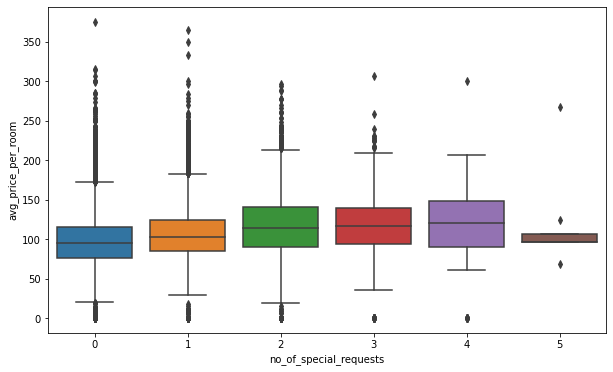

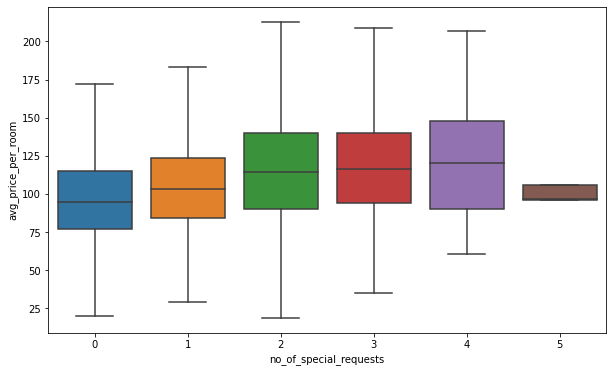

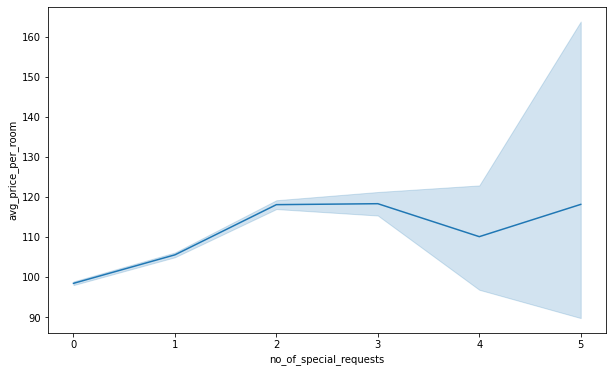

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


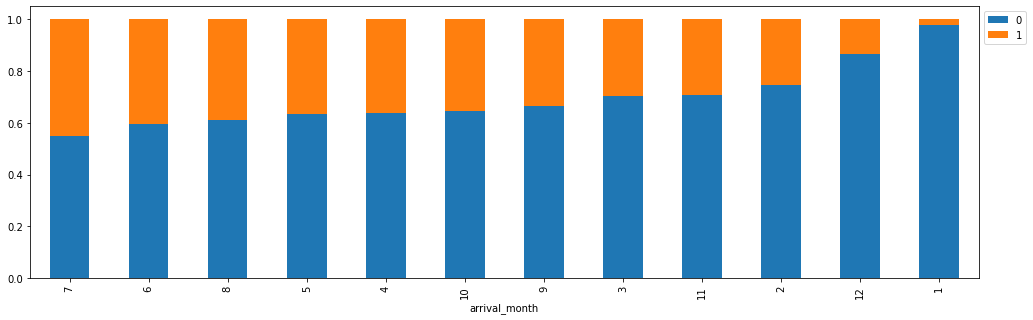

<Figure size 720x432 with 0 Axes>

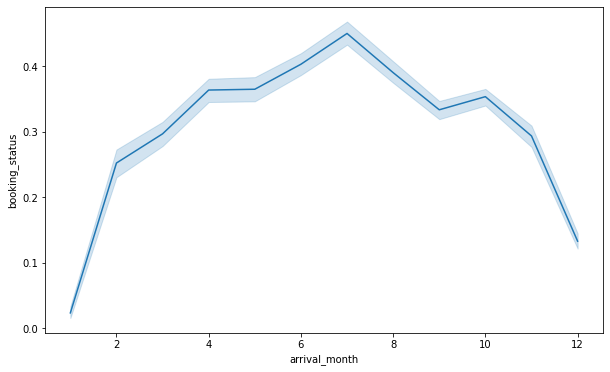

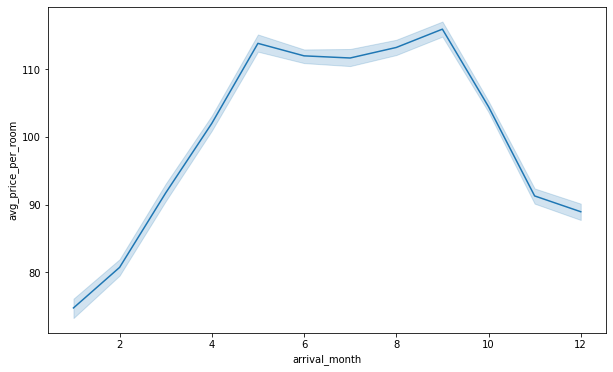

In [ ]:
#exploring data again after manipulation 
histogram_boxplot(data, "lead_time")
histogram_boxplot(data, 'avg_price_per_room')
data[data["avg_price_per_room"] == 0]
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()
histogram_boxplot(data, 'no_of_previous_cancellations')
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')
labeled_barplot(data, 'no_of_adults')
labeled_barplot(data, 'no_of_children')
labeled_barplot(data, 'no_of_week_nights')
labeled_barplot(data, 'no_of_weekend_nights')
labeled_barplot(data, 'required_car_parking_space')
labeled_barplot(data, 'type_of_meal_plan')
labeled_barplot(data, 'room_type_reserved')
labeled_barplot(data, 'arrival_month')
labeled_barplot(data, 'arrival_year')
labeled_barplot(data, 'market_segment_type')
labeled_barplot(data, 'no_of_special_requests')
labeled_barplot(data, 'booking_status')
labeled_barplot(data, 'repeated_guest')

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x= "market_segment_type", y="avg_price_per_room")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "market_segment_type", y="avg_price_per_room")
plt.show()

stacked_barplot(data, "market_segment_type", "booking_status")

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="booking_status", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x= "booking_status", y="avg_price_per_room")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "booking_status", y="avg_price_per_room")
plt.show()

distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="booking_status", y="lead_time", palette="gist_rainbow"
)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x= "booking_status", y="lead_time")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "booking_status", y="lead_time")
plt.show()

distribution_plot_wrt_target(data, "lead_time", "booking_status")

stacked_barplot(data, "no_of_previous_cancellations", "repeated_guest")
plt.figure(figsize=(10, 6))

stacked_barplot(data, "no_of_special_requests", "booking_status")
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x= "booking_status", y="no_of_special_requests")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='no_of_special_requests', y='avg_price_per_room')  
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='no_of_special_requests', y='avg_price_per_room', showfliers=False)  
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='no_of_special_requests', y='avg_price_per_room')  
plt.show()

stacked_barplot(data, "arrival_month", "booking_status")
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='arrival_month', y='booking_status')  
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room')
plt.show()

*Data looks pretty similar, nothing super notable. *

**Model Building**

Goal: predicting which booking is likely to be canceled.

The model can be wrong though: 

Type I error: Predicted to not be cancelled but is in reality cancelled. 

Type II error: Predicted to be cancelled but in reality is not cancelled. 

Going to try to mititgate loses. 

Will use F1 Score (higher the better) to reduce these false positives and false negatives. 

**fi_score is computed as 2∗Precision∗Recall/Precision+Recall**

In [ ]:
#statsmodel function; checking classification model performance
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression model

**Data Prep**

* Predicting which bookings will be canceled. 
* Need to encode categorical variables 
* Split into train and test

In [ ]:
#more libraries 
# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

#adding constant
X = sm.add_constant(X) 

X = pd.get_dummies(X, drop_first=True) 

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Building Logistic Regression Model**

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3292
Time:                        23:16:38   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

**Observations**

Negative values of the coefficient show that the probability of not canceling with the increase of the corresponding attribute value.

Positive values of the coefficient show that the probability of a canceling increases with the increase of the corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

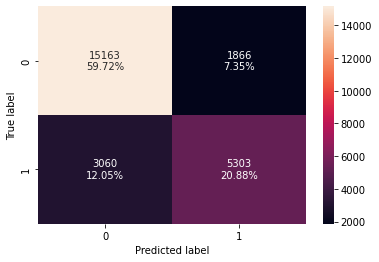

In [ ]:
#confusion matrix 
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


The f1_score of the model is ~0.68 and we will try to maximize it further

The variables used to build the model might contain multicollinearity, which will affect the p-values

We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

**Using Variance Inflation Factor (VIF) to test for multicollinearity**

If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of βk is not inflated at all

If VIF exceeds 5, we say there is moderate multicollinearity

If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

In [ ]:
#function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


There are multiple columns with very high VIF values, indicating presence of strong multicollinearity.

Next is to systematically drop numerical columns with VIF > 5

Also notable: we will ignore the VIF values for dummy variables and the constant (intercept).

It doesn't appear that there are very notable VIF values. 

**Dropping high p-value variables (if applicable)**

Some of the dummy variables in the data have p-value > 0.05.

In essense, they are not significant and will thus be dropped.

From time to time, p-values change after dropping a variable. As such, variables will not be dropped all at once.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**Converting coefficients to odds**

The coefficients (βs) of the logistic regression model are in terms of log(odds) and to find the odds, we have to take the exponential of the coefficients

Therefore, odds=exp(β)

The percentage change in odds is given as (exp(β)−1)∗100

In [ ]:
#converting coefficients to odds
odds = np.exp(lg1.params)

#finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

#removing limit from number of columns to display
pd.set_option("display.max_columns", None)

#adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


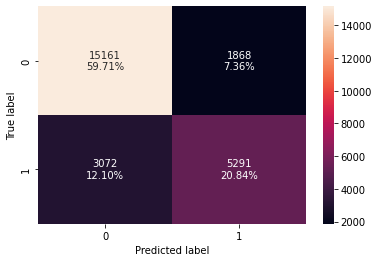

In [ ]:
#confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

**Checking model performance on training set** 

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**ROC-AUC**

**ROC-AUC on training set**

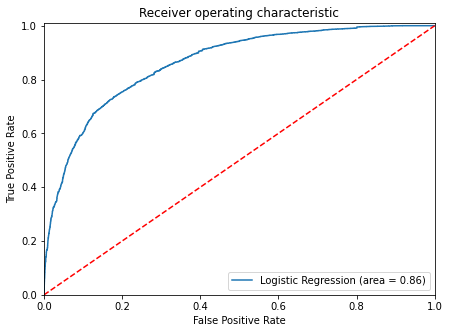

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set.

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558707859


Using model with threshold=0.37

**Checking model performance on training set**

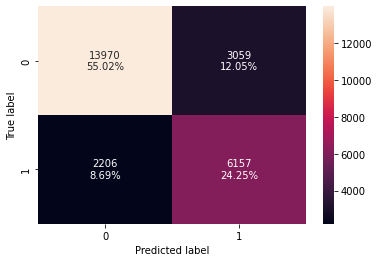

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


Model is performing well on training set.
There's not much improvement in the model performance 

**Precision-Recall curve to try for better threshold**

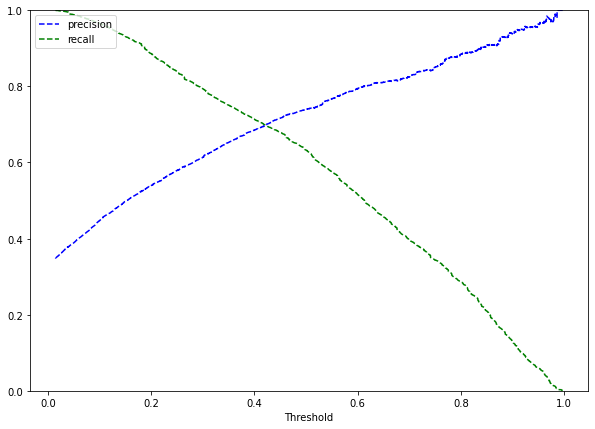

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
#threshold
optimal_threshold_curve = 0.42

Using model with new threshold .42

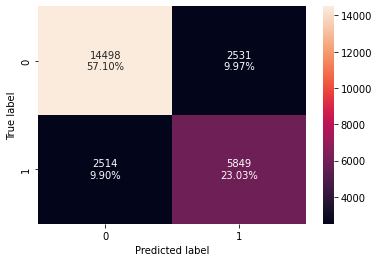

In [ ]:
# creating confusion matrix with .42 threshold
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


**Checking the performance on the test set**

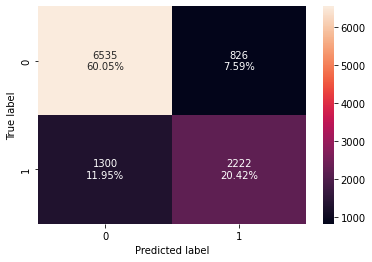

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
print("Test performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
log_reg_model_test_perf


Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


**ROC Curve on Test** 

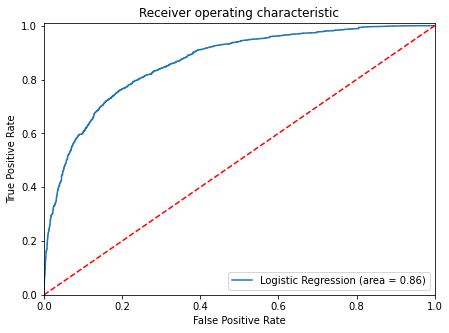

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Using threshold=0.37

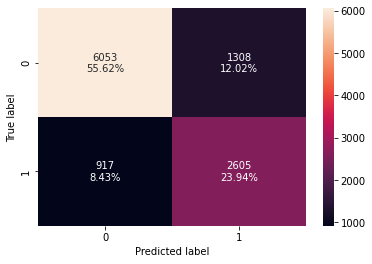

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc) 

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc


Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


threshold=0.42

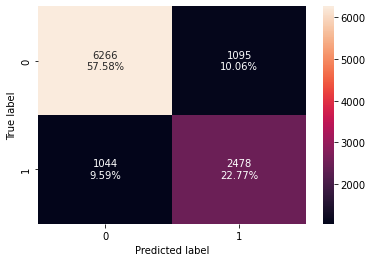

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve) 

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


## Model Performance Comparison and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [ ]:
#training performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


Almost all the three models are performing well on both training and test data without the problem of overfitting

The model with a threshold (0.37) is giving the best F1 score. 

## Building a Decision Tree model

Building a decision tree to predict which bookings will be cancelled. 
Need to encode categorical variables. 

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) 

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


In [ ]:
#defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    #creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Building decision tree model**

In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

**Checking model performance on training set**

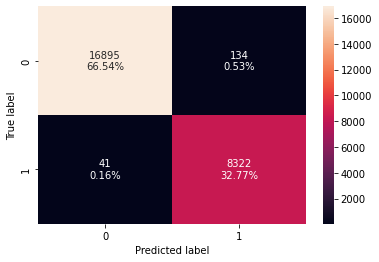

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99311,0.99510,0.98415,0.98960


**Checking model performance on test set**

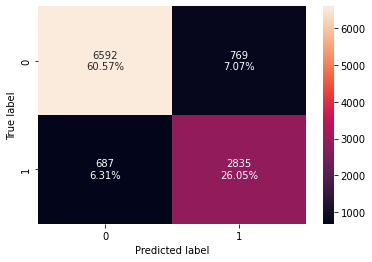

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86621,0.80494,0.78663,0.79568


## Do we need to prune the tree?

Yes F1 value for train is very high and likely overfitting; train F1 is around 99% which is not likely; test F1 is around 80%

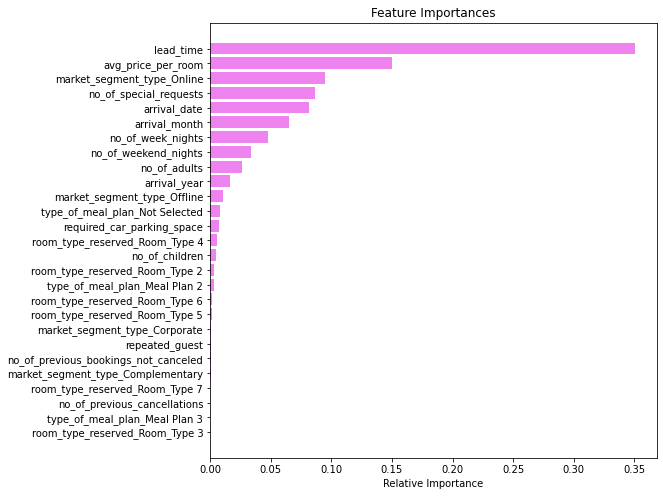

In [ ]:
#checking important features
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Yes we will prune **

Using GridSearch for Hyperparameter tuning of tree model using Grid Search 


In [ ]:
#Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Checking performance on training set**

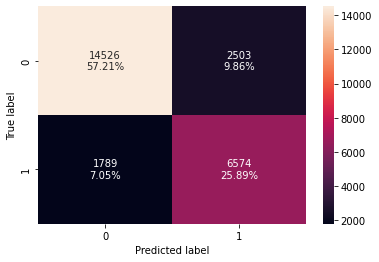

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


**Checking performance on test set**

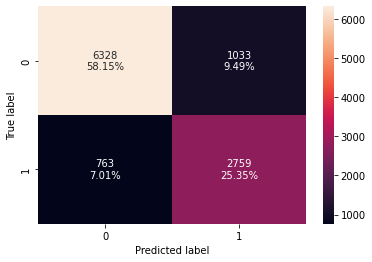

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


**Visual of Decision Tree**

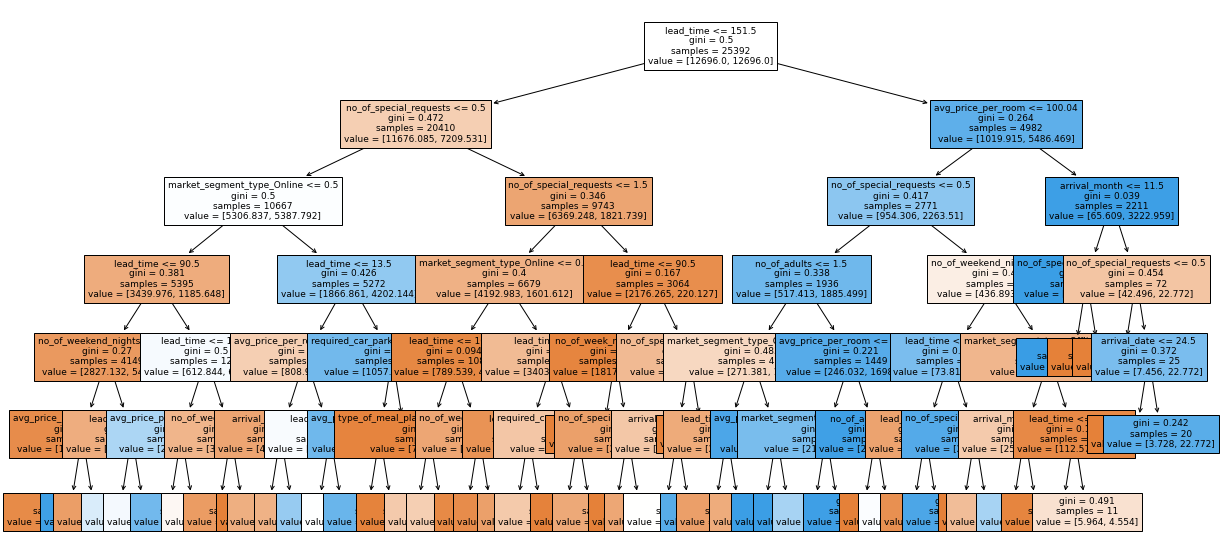

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
#adding arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
#Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

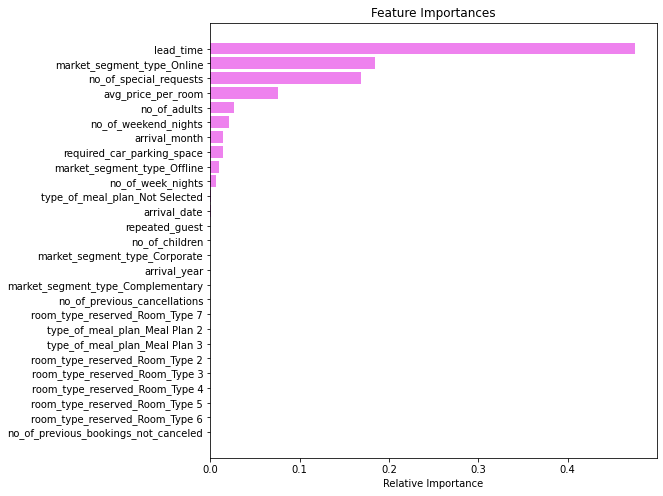

In [ ]:
#importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


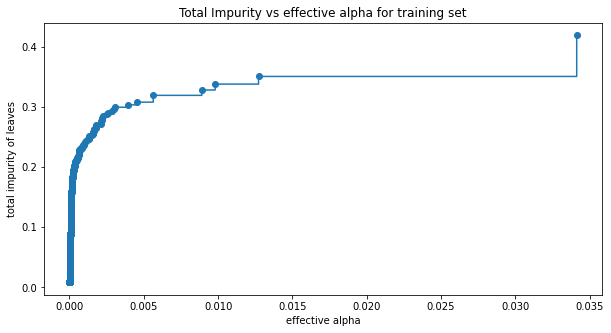

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, will train a decision tree using the effective alphas. 

The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


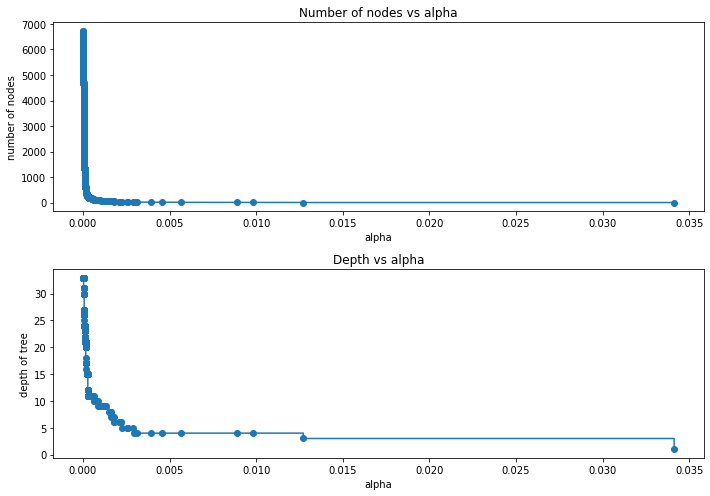

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**F1 Score vs alpha for both training and testing sets**

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


**Checking performance on training set**

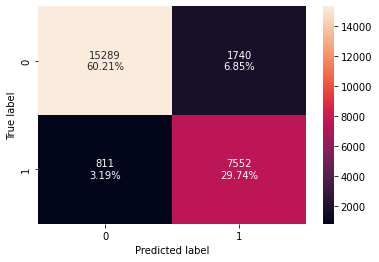

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


**Checking performance on test set**

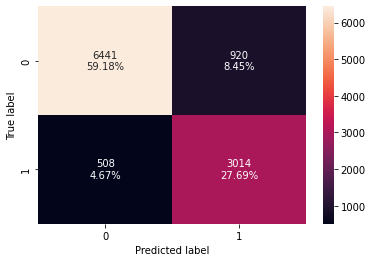

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


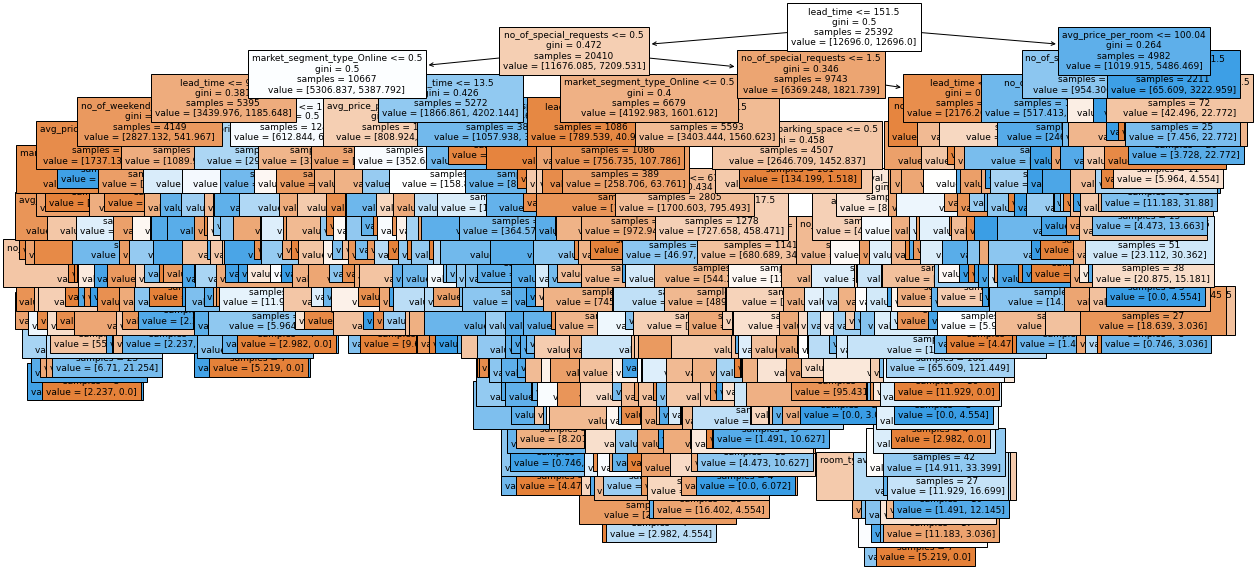

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

*Very complex*

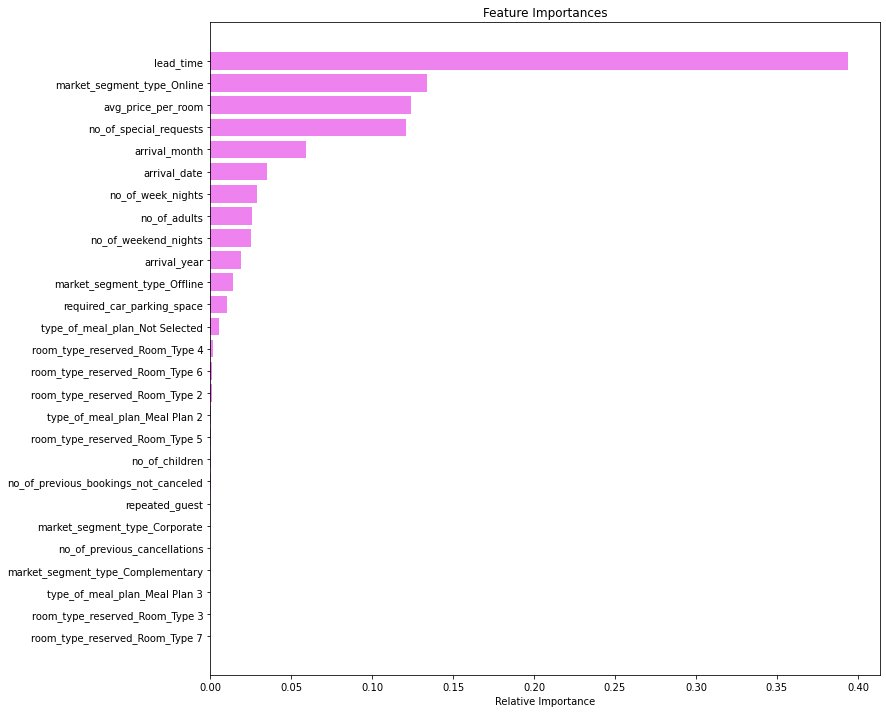

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

**Comparing Trees**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99311,0.83097,0.89954
Recall,0.99510,0.78608,0.90303
Precision,0.98415,0.72425,0.81274
F1,0.98960,0.75390,0.85551


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86621,0.83497,0.86879
Recall,0.80494,0.78336,0.85576
Precision,0.78663,0.72758,0.76614
F1,0.79568,0.75444,0.80848


Although usually data performs better on train than test, the pre-pruning model's F1 values on the test data is performing a very small amount better than the training; the F1s of the pre-pruning model are the most notably close between the test and training data.

The other models have wider desparities between the train and test. 

## Actionable Insights and Recommendations

The pre-pruning model built can be used to predict if a booking is going to be canceled or not with 75% accuracy (again F1 score was used). 

The following features (in order from highest feature importance to lowest feature importance) were most notable in predicting whether a booking will be canceled or not:
* lead_time
* market_segment_type_Online
* no_of_special_request
* avg_price_per_room 

From the pre-pruned decision tree, it has been observed that if the lead_time <= 151.50, no_of_special_requests <= 0.50, and market_segment_type_Online <= 0.50, the booking is likely to be canceled. 

The Inn Hotels Group should give a vigilant eye for these values as they can indicate a cancelation. 

Also the features of lead time, online market segmenet, number of special requests, and average price per room should be explored further. 

**What profitable policies for cancellations and refunds can the hotel adopt?**

The Inn Hotels Group could require a refundable deposit if the guest actually stays for their booking, but it would be non-refundable if they cancel. 

The Inn Hotels Group could provide cheaper booking rates (lower average price per room) for those booking further out (higher lead time) and charge heavy cancellation rates and only partial refunds if booked with this discounted rate--that way even if guests' plans change with a high lead time and cancel, the company still makes money; also guests would be more likely to book early with the discounted rate upfront and not cancel.  

(Some airlines and hotels adopt this structure).    

Additionally, since the online space seems to be the most popular modality for booking/cancelation, requiring the guest to respond to a confirmation text or call might deter from forgetting or all together no-showing; it could encourage more accountability, although this would need further testing. (Doctors' office and restaurants often call guests with appointments/reservations to ensure accountability/profitability). 

As per the number of special requests, encouraging guests to include special requests in their bookings intially may deter from cancelations. Maybe the Inn Hotels Group could provide guests a list of 3 items that could be in their room upon arrival to promote autonomy and a sense of "selectedness." 

**What other recommedations would you suggest to the hotel?**

The busiest months in the hotel are: 

October (busiest), September (second busiest), August (third busiest); more exploration is needed to see if bookings should cost or less during these times.

The market sement that most guests come from is online. Marketing efforts should focus on this modality and streamlining the booking process. 

43% of repeated guests have cancelled. Mostly it appears only once. There should be additional investigation as to how to lower this percentage.

